<a href="https://colab.research.google.com/github/nisha432/ted-talk-view-prediction-/blob/main/TED_Talk_View_Prediction_ipynb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - TED Talk View Prediction  



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team member**    - Nisha Ahire


# **Project Summary -**

In this project, the given data  was on various TED Talks, including information such as the speaker's profession, the length of the talk, the topic, and the date of release and much more information regarding the talks .
I have the done the data preprocessing and visualize some of the plots for the better analysis then used regression analysis to create a model that predicts the number of views a TED Talk is likely to receive based on these factors.

After analyzing the data, I likely found that certain factors were more strongly correlated with views than others. For example, i have found that talks given by speakers in the fields of science, technology, and design tended to receive more views than talks on other topics.i have also found that the length of the talk was an important factor,some speakers, such as Bill Gates, can hold the audience's attention for longer durations.


Using regression model, I am likely able to make predictions on the number of views a TED Talk is likely to receive based on its topic, length, and other factors. My model may not have been 100% accurate, but it provided a useful tool for predicting the popularity of TED Talks and understanding which factors contribute to their success.

To evaluate the performance of my regression model, I likely used various statistical measures such as R-squared, Mean Squared Error (MSE), and Root Mean Squared Error (RMSE). R-squared measures how well the regression model fits the data, with values closer to 1 indicating a better fit. MSE and RMSE measure the difference between the predicted values and the actual values, with lower values indicating better performance.

Additionally, I have performed variable selection to determine which factors were most important in predicting views. This may have involved using techniques such as stepwise regression or Lasso regression to identify the most significant predictors.



Overall, My Project highlights ability to capture patterns and relationships in the data allows TED to make data-driven decisions, such as strategic planning for future events, optimizing content based on viewer preferences, and targeting specific audiences. The accurate view predictions provide valuable guidance for TED's speakers, enabling them to tailor their presentations and topics to enhance the overall viewing experience and generate more engagement and the usefulness of regression analysis in predicting and understanding trends in data, as well as the importance of data analysis in making informed decisions. By identifying the factors that contribute to the popularity of TED Talks, my project provides insights into what makes certain talks more successful than others.






# **GitHub Link -**

link text https://github.com/nisha432/ted-talk-view-prediction-

# **Problem Statement**


# TED is dedicated to researching and sharing knowledge that matters through short talks and presentations. Their goal is to inform and educate global audiences in an accessible way.
# The main objective of this project is to build predictive model,which could help in predicting the view of the videos uploaded on the TEDx website , so that they can bring the same kind of talks on the topics which had the good number of views . 



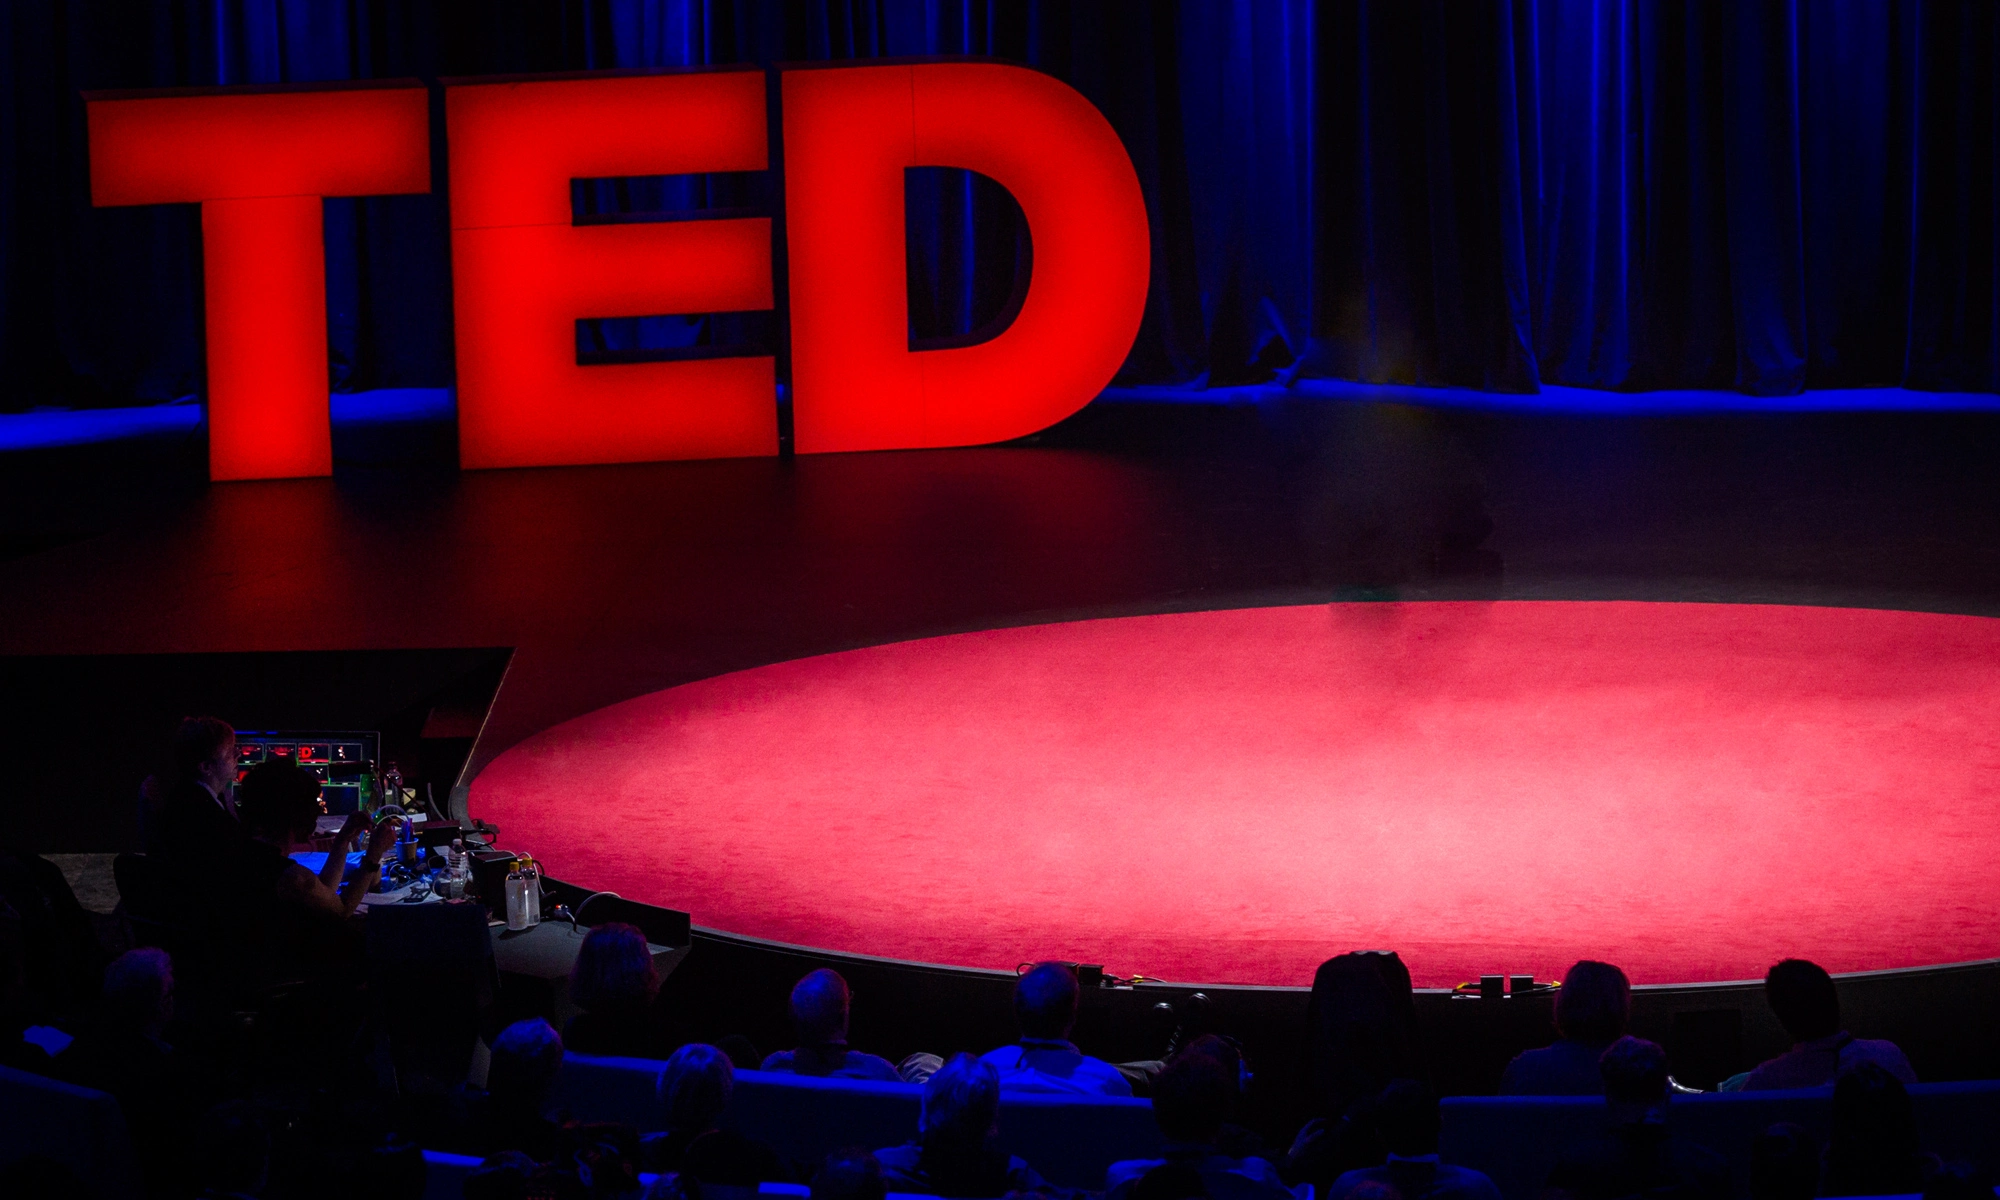

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as snb

from scipy import stats
import missingno as mn


import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/data_ted_talks.csv')

### Dataset First View

In [ ]:
# Dataset First Look
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
dataset.shape

(4005, 19)

The given dataset had 4005 rows ,and 19 columns.

### Dataset Information

In [ ]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df=dataset. pivot_table(index=['talk_id','title','speaker_1','all_speakers'],aggfunc ='size')
df

talk_id  title                                         speaker_1            all_speakers                               
1        Averting the climate crisis                   Al Gore              {0: 'Al Gore'}                                 1
2        Simple designs to save a life                 Amy Smith            {0: 'Amy Smith'}                               1
3        How to rebuild a broken state                 Ashraf Ghani         {0: 'Ashraf Ghani'}                            1
4        The real future of space exploration          Burt Rutan           {0: 'Burt Rutan'}                              1
5        Great cars are great art                      Chris Bangle         {0: 'Chris Bangle'}                            1
                                                                                                                          ..
62707    The wildly complex anatomy of a sneaker       Angel Chang          {0: 'Angel Chang'}                             1
62748

In [ ]:
# Find duplicate rows based on all columns
duplicates =df[df.duplicated()]

# Print the duplicate rows
print(duplicates)

talk_id  title                                         speaker_1            all_speakers                               
2        Simple designs to save a life                 Amy Smith            {0: 'Amy Smith'}                               1
3        How to rebuild a broken state                 Ashraf Ghani         {0: 'Ashraf Ghani'}                            1
4        The real future of space exploration          Burt Rutan           {0: 'Burt Rutan'}                              1
5        Great cars are great art                      Chris Bangle         {0: 'Chris Bangle'}                            1
6        Sampling the ocean's DNA                      Craig Venter         {0: 'Craig Venter'}                            1
                                                                                                                          ..
62707    The wildly complex anatomy of a sneaker       Angel Chang          {0: 'Angel Chang'}                             1
62748

#### Missing Values/Null Values

In [ ]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    return summary
result = resumetable(dataset)
result.sort_values('Missing', ascending= False)


Dataset Shape: (4005, 19)


,Name,dtypes,Missing,Uniques,First Value,Second Value
12,comments,float64,655,601,272.0,628.0
4,occupations,object,522,2049,{0: ['climate advocate']},{0: ['global health expert; data visionary']}
5,about_speakers,object,503,2977,{0: 'Nobel Laureate Al Gore focused the world’...,"{0: 'In Hans Rosling’s hands, data sings. Glob..."
3,all_speakers,object,4,3306,{0: 'Al Gore'},{0: 'Hans Rosling'}
7,recorded_date,object,1,1334,2006-02-25,2006-02-22
0,talk_id,int64,0,4005,1,92
17,description,object,0,4005,With the same humor and humanity he exuded in ...,You've never seen data presented like this. Wi...
16,url,object,0,4005,https://www.ted.com/talks/al_gore_averting_the...,https://www.ted.com/talks/hans_rosling_the_bes...
15,related_talks,object,0,4005,"{243: 'New thinking on the climate crisis', 54...","{2056: ""Own your body's data"", 2296: 'A visual..."
14,topics,object,0,3977,"['alternative energy', 'cars', 'climate change...","['Africa', 'Asia', 'Google', 'demo', 'economic..."


In [ ]:
 # Missing Values/Null Values Count
 print(dataset.isnull().sum())


talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64


In [ ]:
# Visualizing the missing values

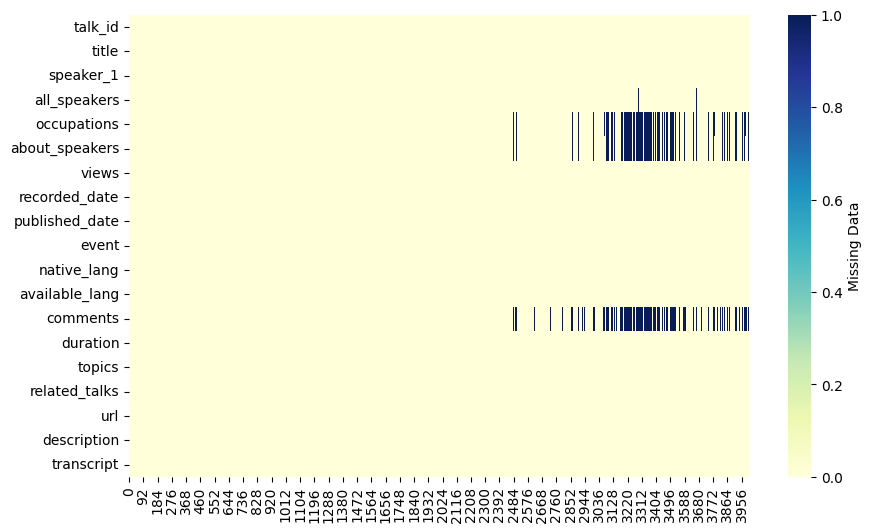

In [ ]:
plt.figure(figsize=(10,6))
snb.heatmap(dataset.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)

<Figure size 1000x600 with 0 Axes>

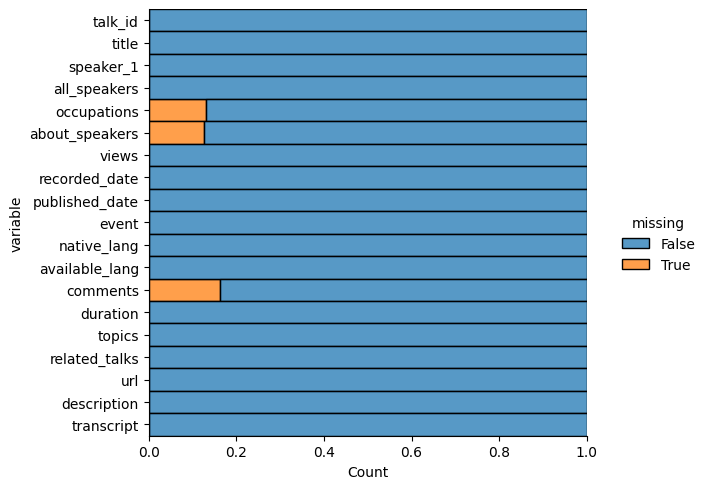

In [ ]:
plt.figure(figsize=(10,6))
snb.displot(
    data=dataset.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
 print(dataset.isnull().values.sum())

1685


### What did you know about your dataset?

The given dataset has 4005 rows and 19 columns.Many columns like comments,occupations, about_speakers,all_speakers,recorded_date have missing values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
columns=list(dataset.columns)
columns

['talk_id',
 'title',
 'speaker_1',
 'all_speakers',
 'occupations',
 'about_speakers',
 'views',
 'recorded_date',
 'published_date',
 'event',
 'native_lang',
 'available_lang',
 'comments',
 'duration',
 'topics',
 'related_talks',
 'url',
 'description',
 'transcript']

In [ ]:
# Dataset Describe 
#Describing only numeric fields are returned.


dataset.describe()

,talk_id,views,comments,duration
count,4005.000000,4.005000e+03,3350.000000,4005.000000
mean,12432.538327,2.148006e+06,161.997015,724.011236
std,17447.576262,3.451226e+06,268.838922,361.775462
min,1.000000,0.000000e+00,0.000000,60.000000
25%,1252.000000,8.820690e+05,38.000000,393.000000
50%,2333.000000,1.375508e+06,89.000000,738.000000
75%,23777.000000,2.133110e+06,188.000000,974.000000
max,62794.000000,6.505195e+07,6449.000000,3922.000000


In [ ]:
#Including only string columns in a DataFrame description.
dataset.describe(include='object')


,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript
count,4005,4005,4001,3483,3502,4004,4005,4005,4005,4005,4005,4005,4005,4005,4005
unique,4005,3274,3306,2049,2977,1334,2962,459,12,3902,3977,4005,4005,4005,4005
top,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,2017-04-24,2017-09-07,TED-Ed,en,['en'],"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,1,34,34,53,10,97,27,556,3957,24,8,1,1,1,1


In [ ]:
# Describing all columns of a DataFrame regardless of data type.
dataset.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


### Variables Description 

talk_id: Talk identification number provided by TED

title: Title of the talk

speaker_1: First speaker in TED's speaker list

all_speakers: Speakers in the talk

occupations: Occupations of the speakers

about_speakers: Blurb about each speaker

recorded_date: Date the talk was recorded

published_date: Date the talk was published to TED.com

event: Event or medium in which the talk was given

native_lang: Language the talk was given in

available_lang: All available languages (lang_code) for a talk

comments: Count of comments

duration: Duration in seconds

topics: Related tags or topics for the talk

related_talks: Related talks (key='talk_id',value='title')

url: URL of the talk

description: Description of the talk

transcript: Full transcript of the talk


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"Unique values in {column} column: {unique_values}")

Unique values in talk_id column: [    1    92     7 ... 62263 62784 62794]
Unique values in title column: ['Averting the climate crisis' "The best stats you've ever seen"
 'Simplicity sells' ... 'How "policing for profit" undermines your rights'
 'The electrifying speeches of Sojourner Truth'
 'The most important anus in the ocean']
Unique values in speaker_1 column: ['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Dick M. Carpenter II'
 'Daina Ramey Berry' 'Cella Wright']
Unique values in all_speakers column: ["{0: 'Al Gore'}" "{0: 'Hans Rosling'}" "{0: 'David Pogue'}" ...
 "{0: 'Dick M. Carpenter II'}" "{0: 'Daina Ramey Berry'}"
 "{0: 'Cella Wright'}"]
Unique values in occupations column: ["{0: ['climate advocate']}"
 "{0: ['global health expert; data visionary']}"
 "{0: ['technology columnist']}" ...
 "{0: ['psychotherapist', 'psychosomatic psychiatrist']}"
 "{0: ['epidemiologist', 'philanthropist'], 1: ['head of ted']}"
 "{0: ['law researcher']}"]
Unique values in about_speakers column

In [ ]:
# Checking the number of unique values for each column in the dataset
dataset.nunique()

talk_id           4005
title             4005
speaker_1         3274
all_speakers      3306
occupations       2049
about_speakers    2977
views             3996
recorded_date     1334
published_date    2962
event              459
native_lang         12
available_lang    3902
comments           601
duration          1188
topics            3977
related_talks     4005
url               4005
description       4005
transcript        4005
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
dataset.drop(['talk_id','about_speakers','url','description','transcript'], axis=1)


,title,speaker_1,all_speakers,occupations,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks
0,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54..."
1,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual..."
2,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '..."
3,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...
4,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...
4001,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...
4002,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ..."
4003,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,{0: 'Daina Ramey Berry'},NaN,56582,2020-04-28,2020-04-30,TED-Ed,en,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...


### What all manipulations have you done and insights you found?

I have droped some of the colums ,which were not useful for finding the insights.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

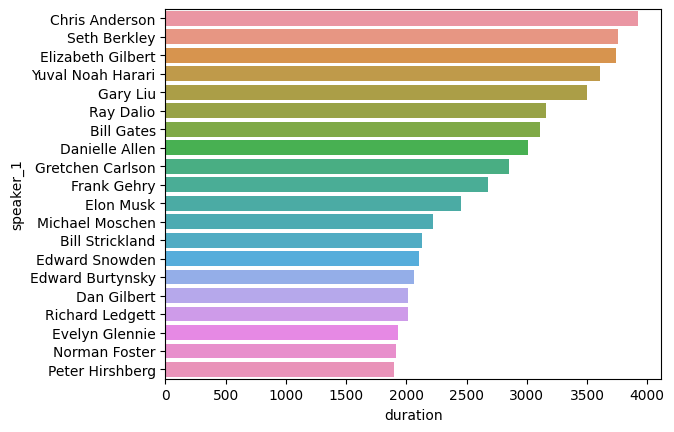

In [ ]:
# Chart - 1 visualization code
ax = snb.barplot(x="duration", y="speaker_1", data=dataset.sort_values('duration', ascending=False)[:20])


##### 1. Why did you pick the specific chart?

I chose this chart because ,Many people dislike watching lengthier films unless they are really engaging SO it may be beneficial to identify the speaker who has delivered the longest presentation.











##### 2. What is/are the insight(s) found from the chart?

The plot above indicates that Chris Anderson delivered a presentation for an extended duration.









##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely, this insight can prove to be quite valuable. By analyzing this graph, we can assess the level of engagement of the audience towards a speaker and predict whether they were successful in capturing the viewers' attention. Additionally, this graph can serve as a foundation for further analysis and aid in making informed decisions regarding future events or speakers


#### Chart - 2

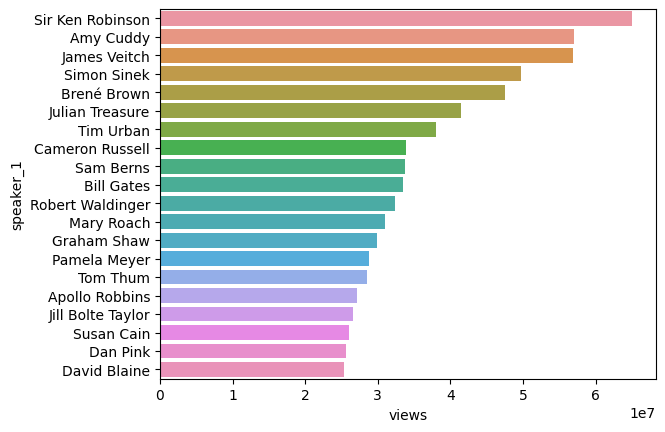

In [ ]:
# Chart - 2 visualization code
ax = snb.barplot(x="views", y="speaker_1", data=dataset.sort_values('views', ascending=False)[:20])


##### 1. Why did you pick the specific chart?

I selected this particular graph because I wanted to determine the viewership of longer videos and whether they receive a substantial number of views or not. The graph can help me analyze if viewers lose interest in longer videos and if it is necessary to keep the duration shorter to capture their attention.






##### 2. What is/are the insight(s) found from the chart?

In the above plot, we can observe that Chris Anderson's name is not present, but several other names from the previous plot are visible.







##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, that's correct! Analyzing the speaker with the maximum views can provide valuable insights into what topics and presentation styles are resonating with the audience. It's also interesting to note that some speakers, such as Bill Gates, can hold the audience's attention for longer durations, despite the length of their talks. This could be due to a variety of factors, such as the speaker's charisma, the relevance of the topic, or the way the presentation is structured. By analyzing these patterns, businesses can gain a better understanding of how to create content that is both engaging and informative for their target audience.





 Is there any relationship between view and duration? is the question from above two graphs 

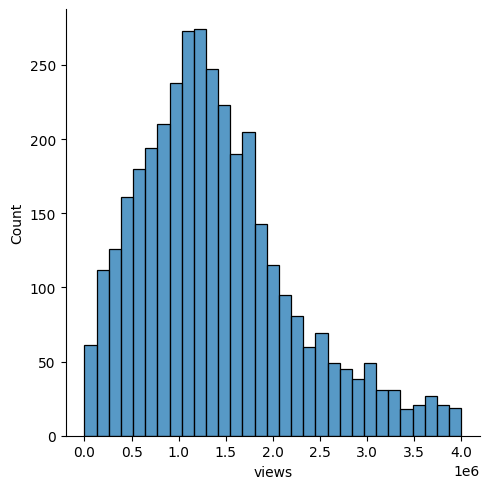

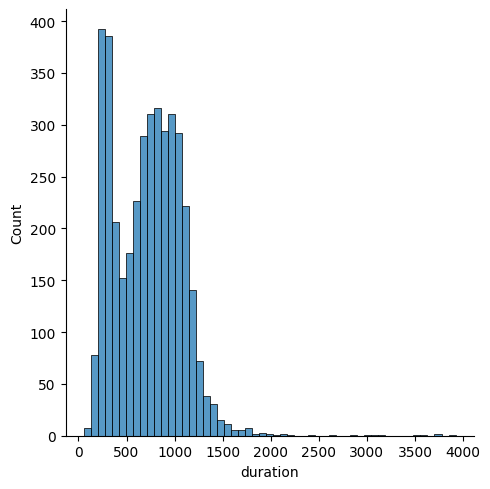

In [ ]:
#let's see the distribution of views
snb.displot(dataset[dataset['views'] < 0.4e7]['views'])
#let's see the distribution of duration
snb.displot(dataset[dataset['duration'] < 0.4e7]['duration'])


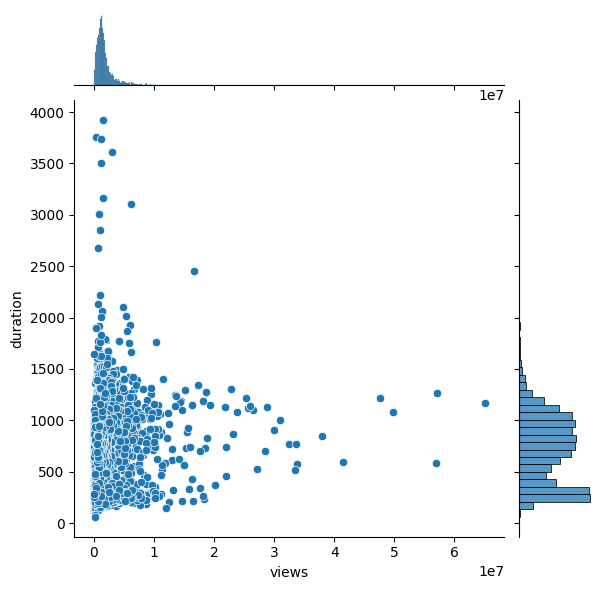

In [ ]:
snb.jointplot(x='views', y='duration', data=dataset)


In general, longer talks tend to have a longer duration, although there can be some variation in this relationship depending on the specific talk. This is likely because the more content a talk covers, the longer it will take to deliver it. However, as I mentioned earlier, the length of a talk may not be the only factor that affects its popularity. Other factors, such as the speaker, topic, and style of presentation, may also play a role in determining the success of a TED Talk.





#### Chart - 3

In [ ]:
# Chart - 3 visualization code

In [ ]:
# finding out the top most native language used 
z=dataset['native_lang'].value_counts().head(10)
print(z)

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
Name: native_lang, dtype: int64


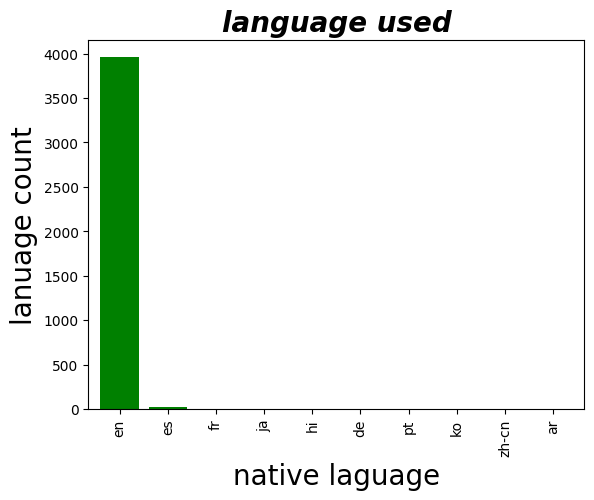

In [ ]:
# Create the plot object
z.plot(kind='bar',color='green',width=0.8)
plt.title('language used',fontdict={'fontsize':20,'fontweight':'bold','fontstyle':'oblique'})
plt.ylabel('lanuage count',fontdict={'fontsize':20,'fontweight':'normal'})
plt.xlabel('native laguage',fontdict={'fontsize':20,'fontweight':'normal'})
plt.rcParams['figure.figsize'] = (10,10)


##### 1. Why did you pick the specific chart?

I chose this chart to determine which native language has been used the most.







##### 2. What is/are the insight(s) found from the chart?

 This shows that english language has been used widely .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight highlights that English is a popular language due to its global reach and wide understanding. Therefore, we can use English more frequently. However, it is also important to focus on other native languages since there may be some people who prefer to consume content in their own language. Neglecting these languages could result in a slightly negative impact on growth

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

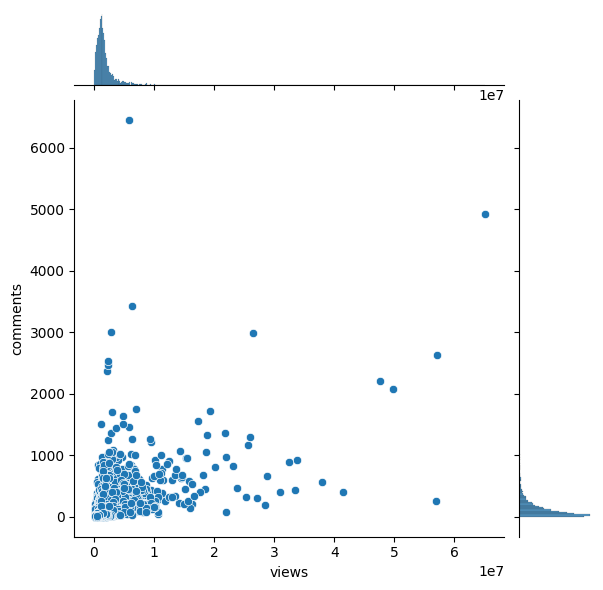

In [ ]:
snb.jointplot(x='views', y='comments', data=dataset)


##### 1. Why did you pick the specific chart?



I chose this chart to investigate the relationship between views and comments. It appears that popular videos tend to have more comments and foster more discussion.








##### 2. What is/are the insight(s) found from the chart?

This chart shows that there is a strong relationship between views and comments .

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight highlights that videos with a significant number of views and comments are likely to be popular due to their compelling content, which could be due to the topic or the speaker. Therefore, creating similar talks that are engaging and informative could have a positive impact on the business by attracting more views and encouraging audience engagement.





#### Chart - 5

In [ ]:
# Chart - 5 visualization code

In [ ]:
dataset[['title', 'speaker_1','views', 'comments', 'duration']].sort_values('views', ascending=False).head(10)

,title,speaker_1,views,comments,duration
4,Do schools kill creativity?,Sir Ken Robinson,65051954,4931.0,1164
1296,Your body language may shape who you are,Amy Cuddy,57074270,2633.0,1262
2062,This is what happens when you reply to spam email,James Veitch,56932551,257.0,588
646,How great leaders inspire action,Simon Sinek,49730580,2079.0,1084
796,The power of vulnerability,Brené Brown,47544833,2209.0,1219
1724,How to speak so that people want to listen,Julian Treasure,41504331,405.0,598
2108,Inside the mind of a master procrastinator,Tim Urban,37976820,559.0,843
1366,"Looks aren't everything. Believe me, I'm a model.",Cameron Russell,33874546,917.0,577
2724,My philosophy for a happy life,Sam Berns,33691484,NaN,765
1898,The next outbreak? We're not ready,Bill Gates,33521780,439.0,512


##### 1. Why did you pick the specific chart?

I chose this chart to determine which talk became popular based on its number of views.








##### 2. What is/are the insight(s) found from the chart?

Based on the above chart, it is clear that Sir Ken Robinson is the most popular TED speaker by views, and his talk on the topic "Do Schools Kill Creativity?" is the one that propelled him to popularity.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight can be useful because a talk can become popular either due to the topic or the speaker. Therefore, if we want to create engaging and popular talks, we can consider bringing in speakers who have previously given popular talks, and we can also explore topics that have previously been successful. By doing so, there is a higher chance that our future talks will resonate with our audience and become popular.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

In [ ]:
dataset[['title', 'speaker_1','views', 'comments', 'duration']].sort_values('comments', ascending=False).head(10)

,title,speaker_1,views,comments,duration
94,Militant atheism,Richard Dawkins,5788514,6449.0,1750
4,Do schools kill creativity?,Sir Ken Robinson,65051954,4931.0,1164
617,Science can answer moral questions,Sam Harris,6331825,3424.0,1386
1735,How do you explain consciousness?,David Chalmers,2910843,3006.0,1117
197,My stroke of insight,Jill Bolte Taylor,26553231,2984.0,1099
1296,Your body language may shape who you are,Amy Cuddy,57074270,2633.0,1262
911,Taking imagination seriously,Janet Echelman,2297341,2529.0,566
799,On reading the Koran,Lesley Hazleton,2269271,2463.0,573
631,The danger of science denial,Michael Specter,2170700,2366.0,1141
796,The power of vulnerability,Brené Brown,47544833,2209.0,1219


##### 1. Why did you pick the specific chart?

I selected this chart to determine which talk became popular based on its number of comments. Since comments allow viewers to discuss the topic and share their thoughts and opinions, a higher number of comments can indicate that the topic is particularly interesting and engaging. Additionally, the speaker could also be a factor in generating more comments. Therefore, by looking at the title and speaker of the popular talks with high comment counts, we may be able to identify which topics and speakers are likely to generate more audience engagement in the future.





##### 2. What is/are the insight(s) found from the chart?

According to the chart, the talk titled "Militant Atheism" by Richard Dawkins received the maximum number of comments, indicating that the topic and speaker were particularly engaging and sparked a lot of discussion among viewers.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight highlights that the "Militant Atheism" talk by Richard Dawkins received a high number of comments, indicating that it was a particularly engaging and thought-provoking topic. To increase the business, TED could consider bringing in speakers who can explore similar topics that are likely to spark audience engagement and generate more comments. Additionally, they could also try pairing speakers with different topics to see if they can generate similar levels of audience engagement and comments.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

In [ ]:
df = pd.DataFrame(dataset)
df

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B..."
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,2020-04-28,TEDxMileHigh,en,['en'],9.0,774,"['society

In [ ]:
df['published_year'] = pd.DatetimeIndex(df['published_date']).year
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006


In [ ]:
df.loc[:, 'published_year']

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
4000    2020
4001    2020
4002    2020
4003    2020
4004    2020
Name: published_year, Length: 4005, dtype: int64

In [ ]:
df['published_year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

In [ ]:
df['published_year'].nunique()

15

In [ ]:
years=df['published_year'].unique()
print(years)
number_of_talks=list(df['published_year'].value_counts(ascending=True).sort_index(ascending=True))
print(number_of_talks)

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019
 2020]
[49, 119, 185, 215, 230, 255, 303, 242, 240, 220, 242, 315, 477, 702, 211]


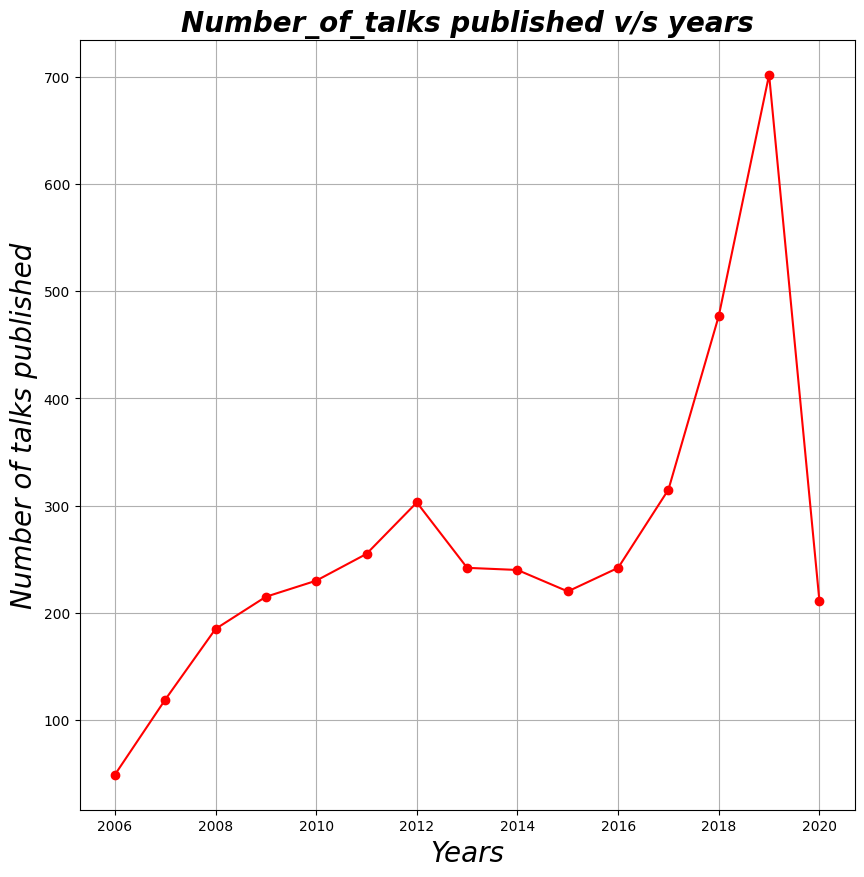

In [ ]:
plt.plot(years,number_of_talks,color='red', marker='o')
plt.title('Number_of_talks published v/s years',fontdict={'fontsize':20,'fontweight':'bold','fontstyle':'oblique'})
plt.xlabel('Years',fontdict={'fontsize':20,'fontweight':'normal','fontstyle':'oblique'})
plt.ylabel('Number of talks published',fontdict={'fontsize':20,'fontweight':'normal','fontstyle':'oblique'})
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

I have chosen this graph to gain insights into the growth or decline of the business.





##### 2. What is/are the insight(s) found from the chart?

Based on the data provided in the graph from the years 2006-2020, we can see that there was a steady increase in the number of talks published from 2006 to 2012. However, after 2012, there was a decrease in the number of talks published. The trend reversed in 2015, and the number of talks published began to increase again and continued to grow. The maximum number of talks published occurred in 2019. However, the data only goes up to April 2020, so we cannot say for certain if the trend of decreasing talks published has continued after that time.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, that's a good point. The number of talks published each year can be used as an indicator of the growth or expansion of the business. If there is a steady increase in the number of talks published, it could be an indication that the business is growing and expanding. However, it is important to keep in mind that there could be other factors affecting the number of talks published, such as changes in the company's policies or resources, which could also impact the growth of the business.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

In [ ]:
ted_final=df[['published_year','views']]
ted_final

,published_year,views
0,2006,3523392
1,2006,14501685
2,2006,1920832
3,2006,2664069
4,2006,65051954
...,...,...
4000,2020,502934
4001,2020,307187
4002,2020,464414
4003,2020,56582


In [ ]:
ted_final['published_year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

In [ ]:
 df3=df.pivot_table(columns='published_year', values='views',aggfunc='sum')
 df3

published_year,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
views,241913168,220028280,335031161,445396065,503416439,492776405,665473046,729009369,581655293,617490537,661803437,680519097,871101863,1361604924,195543239


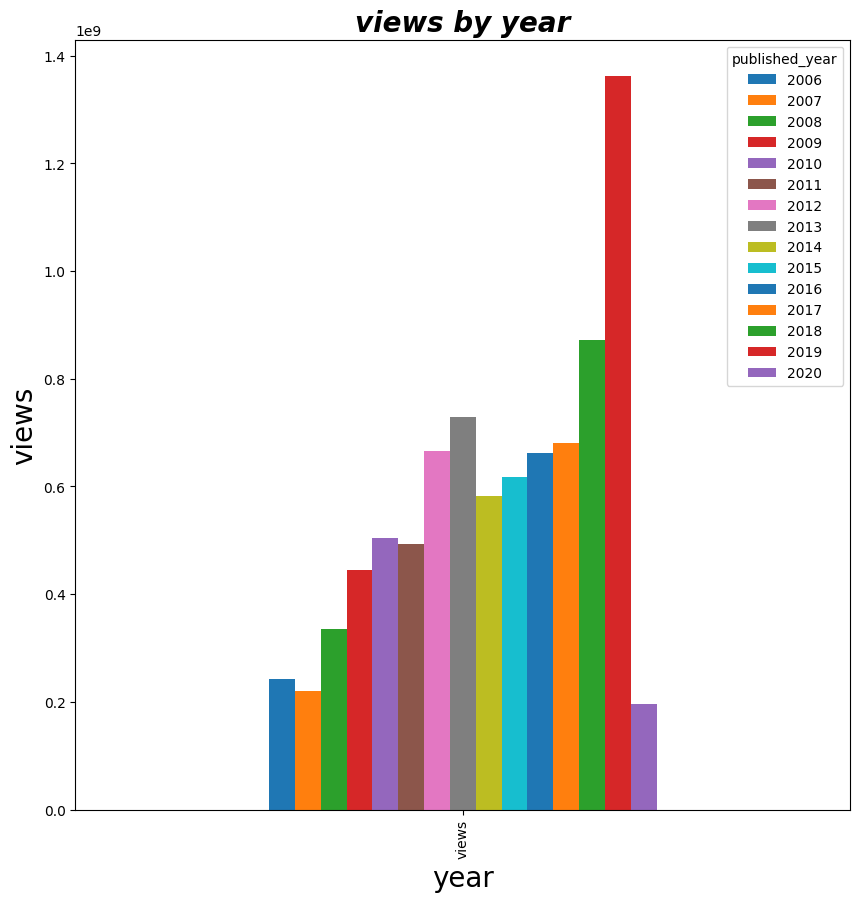

In [ ]:
df3.plot(kind='bar')
plt.title('views by year',fontdict={'fontsize':20,'fontweight':'bold','fontstyle':'oblique'})
plt.ylabel('views',fontdict={'fontsize':20,'fontweight':'normal'})
plt.xlabel('year',fontdict={'fontsize':20,'fontweight':'normal'})
plt.rcParams['figure.figsize'] = (10,10)


##### 1. Why did you pick the specific chart?

This graph can provide insight into the popularity of the TED talks each year and can help us understand which years had more viewer engagement.

##### 2. What is/are the insight(s) found from the chart?

This graph shows us that the total number of views of TED talks has been increasing consistently over the years, with a sharp decline in 2020 (up until April), which may be due to the global pandemic and the resulting changes in people's behavior and priorities. It will be interesting to see if this trend continues or if there will be a rebound in views in the coming years.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 While the increasing popularity of TED talks is a positive sign for the business, it's important to continue to strive for growth and find ways to engage even more viewers. This could include exploring new topics, featuring diverse speakers, or experimenting with different formats to keep the audience engaged and interested.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

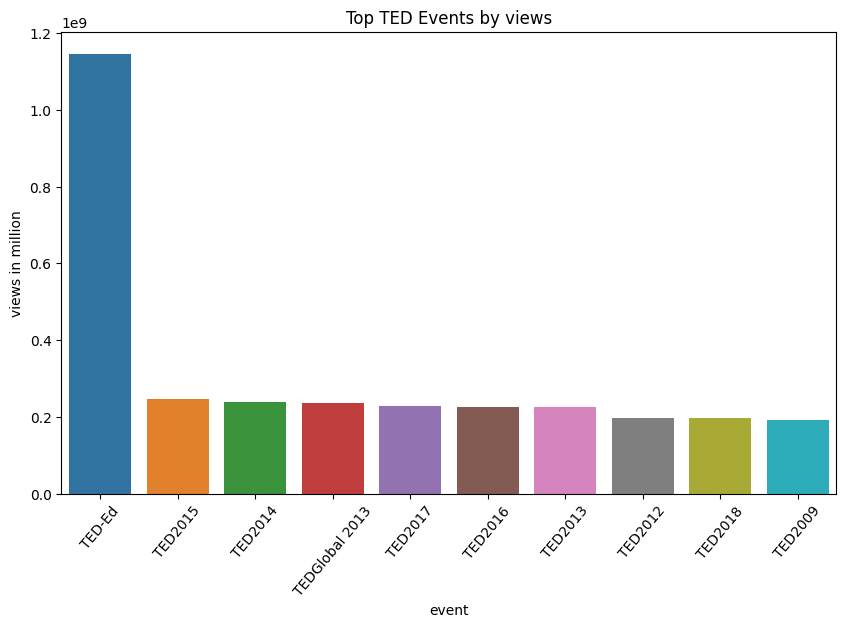

In [ ]:
ted=dataset.groupby(['event'],as_index=False).agg({'views':'sum','talk_id':'count'}).sort_values('views',ascending=False).reset_index()[:10]
ted['talk_id']=ted['views']/ted['talk_id']
plt.figure(figsize=(10,6))
ax=snb.barplot(x='event',y='views',data=ted)
labels=ax.get_xticklabels()
plt.title('Top TED Events by views')
plt.ylabel('views in million')
plt.setp(labels, rotation=50);


##### 1. Why did you pick the specific chart?

I have selected this chart to know which event was the most popular among the viewers.

##### 2. What is/are the insight(s) found from the chart?

The insight provided by the chart reveals the top ten TED events by views, with the TED-ED event being the most popular among viewers and We can see that the TED2015 event was the most popular among viewers, followed by TED2014 and TEDGlobal 2013. Knowing which event was the most popular can help in analyzing the factors that contributed to its success and replicate those factors in future events to increase the business.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the successful strategies and arrangements of the most popular event, we can apply them to other events and potentially increase their popularity as well. This can ultimately help in the growth of the business.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

In [ ]:
dataset['occupations'].nunique()

2049

In [ ]:
type('occupations')

str

In [ ]:
a=dataset['occupations'].value_counts().head(10)
print(z)

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
Name: native_lang, dtype: int64


In [ ]:
data = a
df = pd.DataFrame(data)
print(df)



                         occupations
{0: ['writer']}                   53
{0: ['journalist']}               47
{0: ['entrepreneur']}             42
{0: ['artist']}                   41
{0: ['architect']}                38
{0: ['designer']}                 37
{0: ['neuroscientist']}           32
{0: ['psychologist']}             31
{0: ['educator']}                 29
{0: ['inventor']}                 28


In [ ]:
abc=pd.Series()


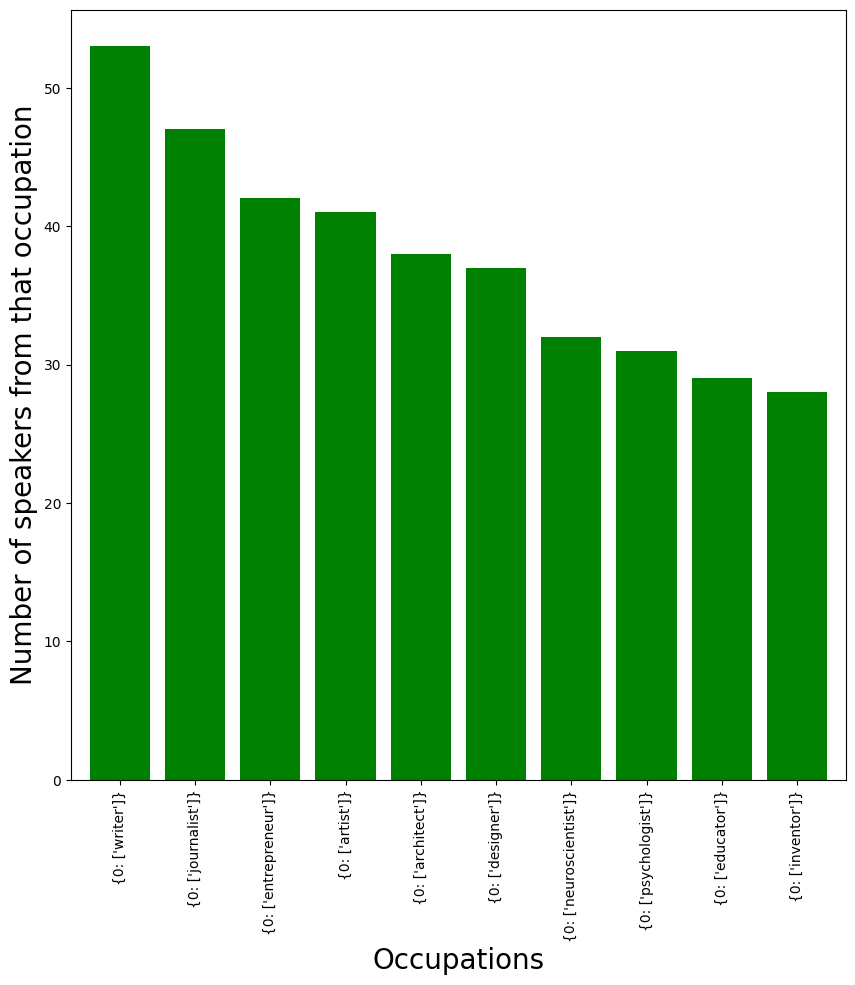

In [ ]:
# Create the plot object
a.plot(kind='bar',color='green',width=0.8)
plt.title('',fontdict={'fontsize':20,'fontweight':'bold','fontstyle':'oblique'})
plt.ylabel('Number of speakers from that occupation',fontdict={'fontsize':20,'fontweight':'normal'})
plt.xlabel('Occupations',fontdict={'fontsize':20,'fontweight':'normal'})
plt.rcParams['figure.figsize'] = (10,10)


##### 1. Why did you pick the specific chart?

 we can analyze which professions have more influence among the viewers.

##### 2. What is/are the insight(s) found from the chart?

 Knowing that the speakers with the highest views come from the writers' occupation and also, we can see that the occupation with the highest views is "journalist," followed by "entrepreneur," and "artist". This can help in planning future events or inviting speakers from similar professions to attract more viewers. It can also give insights into what topics and skills are most popular among the viewers, and tailor the talks accordingly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, inviting more writers,journalist,entrepreneur as speakers for TED talks could potentially attract more viewers who are interested in literary and intellectual topics. It may also help broaden the diversity of perspectives and insights presented in TED talks. However, it's important to keep in mind that the popularity of a speaker is not solely determined by their occupation, but also by the topic they are presenting and how engaging they are as a speaker.

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

In [ ]:
dataset[['title', 'speaker_1','views', 'duration']].sort_values('duration', ascending=False).head(10)

,title,speaker_1,views,duration
3768,How we can turn the tide on climate,Chris Anderson,1493370,3922
3965,The quest for the coronavirus vaccine,Seth Berkley,380451,3760
3973,It's OK to feel overwhelmed. Here's what to do...,Elizabeth Gilbert,1142208,3740
2334,Nationalism vs. globalism: the new political d...,Yuval Noah Harari,3028381,3608
3966,What the world can learn from China's response...,Gary Liu,1242418,3503
3982,What coronavirus means for the global economy,Ray Dalio,1579481,3160
3960,How we must respond to the coronavirus pandemic,Bill Gates,6144695,3110
3977,An ethical plan for ending the pandemic and re...,Danielle Allen,845628,3007
2366,Political common ground in a polarized United ...,Gretchen Carlson,1049407,2853
198,My days as a young rebel,Frank Gehry,703868,2678


##### 1. Why did you pick the specific chart?

As we have seen, lengthier videos tend to have less viewers, but there are those that have more viewers despite their length, therefore I was curious as to the title, speaker, and views of these films.

##### 2. What is/are the insight(s) found from the chart?

This insight suggests that while shorter talks tend to be more popular, there are exceptions to this rule. In the case of Chris Anderson's talk, the topic of climate change may have been particularly compelling to viewers, leading to its popularity despite its length. This insight suggests that while video length is an important consideration for TED talks, it is not the only factor in determining a talk's success. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, that is a great strategy. Additionally, we could also analyze the content of the video to identify what made it so engaging and use those insights to create more content that resonates with our viewers. It is also important to note that while video length may be a factor, it is not the only factor that determines viewership. We should continue to focus on producing high-quality content that is informative, engaging, and relevant to our audience's interests.






#### Chart - 12

In [ ]:
# Chart - 12 visualization code

In [ ]:
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006


In [ ]:
relaible_data=dataset[['title','speaker_1','occupations','topics']]
relaible_data

,title,speaker_1,occupations,topics
0,Averting the climate crisis,Al Gore,{0: ['climate advocate']},"['alternative energy', 'cars', 'climate change..."
1,The best stats you've ever seen,Hans Rosling,{0: ['global health expert; data visionary']},"['Africa', 'Asia', 'Google', 'demo', 'economic..."
2,Simplicity sells,David Pogue,{0: ['technology columnist']},"['computers', 'entertainment', 'interface desi..."
3,Greening the ghetto,Majora Carter,{0: ['activist for environmental justice']},"['MacArthur grant', 'activism', 'business', 'c..."
4,Do schools kill creativity?,Sir Ken Robinson,"{0: ['author', 'educator']}","['children', 'creativity', 'culture', 'dance',..."
...,...,...,...,...
4000,"Crisis support for the world, one text away",Nancy Lublin,{0: ['health activist']},"['activism', 'data', 'technology', 'mental hea..."
4001,The dark history of IQ tests,Stefan C Dombrowski,NaN,"['TED-Ed', 'education', 'history', 'animation'..."
4002,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: ['law researcher']},"['society', 'law', 'policy', 'justice system',..."
4003,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,NaN,"['TED-Ed', 'education', 'animation', 'United S..."


##### 1. Why did you pick the specific chart?

I chose this to assess the reliability of the occupation and the title of the speaker's presentation.

##### 2. What is/are the insight(s) found from the chart?

The speaker's occupation and the content of their presentation appear to be reliable, as the talk's title aligns with their profession.





##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This is indeed helpful, as the credibility of the speaker's occupation and their talk is crucial for TED to provide authentic and valuable content. If the speaker's expertise and the content they deliver are not reliable, TED's reputation could be at risk, and the viewers may lose trust, resulting in a negative impact on the business.




#### Chart - 13

In [ ]:
# Chart - 13 visualization code

In [ ]:
df2=pd.DataFrame(dataset)
df2

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_year
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",2020
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",2020
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-2

In [ ]:
df2['published_month'] = pd.DatetimeIndex(df2['published_date']).month
df2.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_year,published_month
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,6
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,6
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,6
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006,6
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,...,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006,6


In [ ]:
df2.loc[:, 'published_month']

0       6
1       6
2       6
3       6
4       6
       ..
4000    4
4001    4
4002    4
4003    4
4004    4
Name: published_month, Length: 4005, dtype: int64

In [ ]:
month=df2['published_month'].unique()
print(month)
number_of_published_talks=list(df2['published_month'].value_counts(ascending=True).sort_index(ascending=True))
print(number_of_published_talks)

[ 6  7  8  9 10 11 12  1  2  4  5  3]
[348, 412, 419, 423, 312, 310, 278, 236, 347, 350, 305, 265]


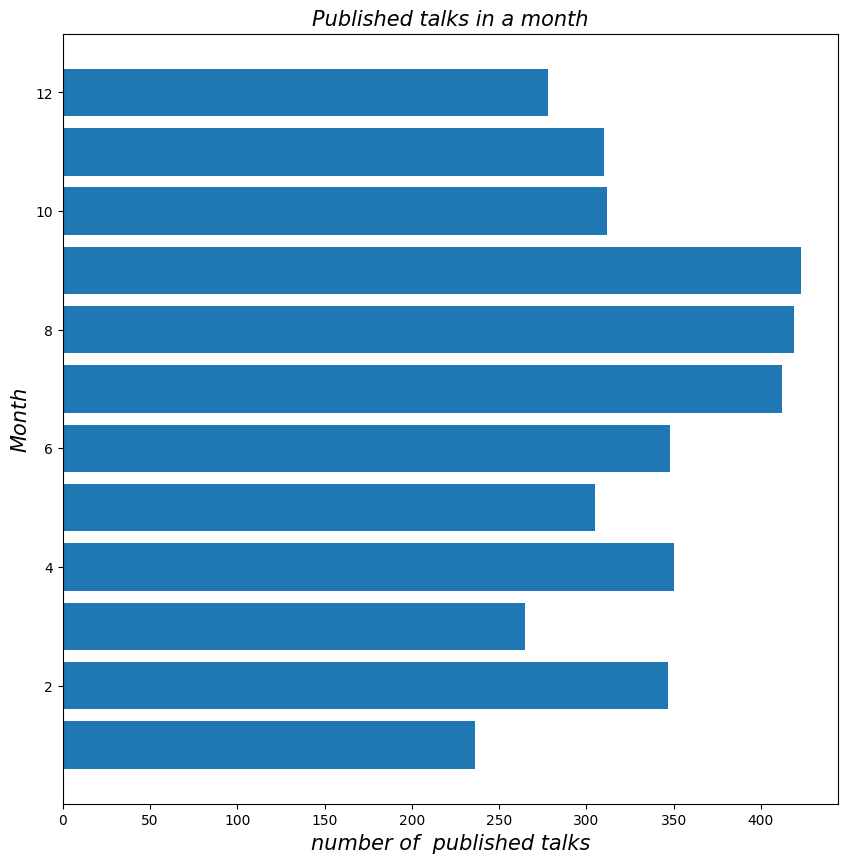

In [ ]:
plt.barh(month,number_of_published_talks)
 # setting label of y-axis
plt.ylabel("Month",fontdict={'fontsize':15,'fontweight':'normal','fontstyle':'oblique'})
 # setting label of x-axis
plt.xlabel("number of  published talks",fontdict={'fontsize':15,'fontweight':'normal','fontstyle':'oblique'})
plt.title("Published talks in a month",fontdict={'fontsize':15,'fontweight':'normal','fontstyle':'oblique'})
plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart out of curiosity to determine which month had the highest number of talks published by TED.





##### 2. What is/are the insight(s) found from the chart?

September, which is the 9th month of the year, had the highest number of talks published by TED.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Although it may not hold significant importance, the chart displays the trend of talks published by TED on a monthly basis throughout the year.


Topics 

In [ ]:
#unique values from a series. 
dataset['topics'].unique()

array(["['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']",
       "['Africa', 'Asia', 'Google', 'demo', 'economics', 'global issues', 'health', 'statistics', 'global development', 'visualizations', 'math']",
       "['computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'technology']",
       ..., "['society', 'law', 'policy', 'justice system', 'TEDx']",
       "['TED-Ed', 'education', 'animation', 'United States', 'women', 'feminism', 'Slavery', 'race', 'history', 'activism', 'speech', 'war', 'religion', 'storytelling']",
       "['animals', 'TED-Ed', 'animation', 'oceans', 'science', 'education', 'biology', 'climate change']"],
      dtype=object)

In [ ]:
# count of unique values from a series. 
dataset['topics'].nunique()

3977

In [ ]:
z=dataset['topics'].value_counts().head(10)
print(z)

['TED-Ed', 'math']                                                             8
['animation', 'TED-Ed', 'math']                                                5
['TED-Ed', 'math', 'animation']                                                3
['TED-Ed', 'animation', 'education', 'math']                                   3
['business', 'entrepreneur', 'failure', 'communication', 'personal growth']    2
['design', 'entertainment', 'live music', 'music', 'technology']               2
['art', 'creativity']                                                          2
['cities', 'culture', 'design', 'transportation']                              2
['culture', 'love', 'relationships', 'sex']                                    2
['demo', 'design', 'interface design', 'technology']                           2
Name: topics, dtype: int64


In [ ]:
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_year,published_month
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,6
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,6
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,6
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006,6
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,...,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006,6


#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
dataset2= dataset.copy() 

In [ ]:
dataset2.columns


Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_year',
       'published_month'],
      dtype='object')

<Axes: >

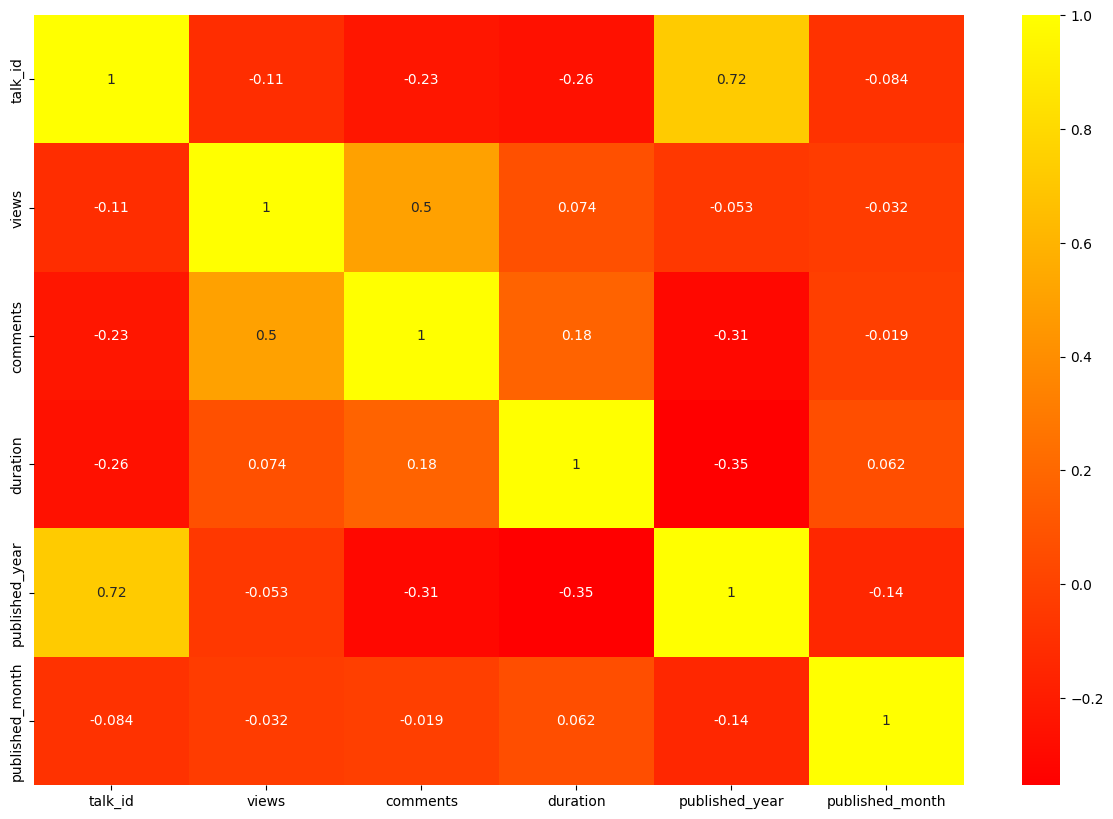

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
snb.heatmap(dataset2.corr(), annot= True, cmap= "autumn",ax=ax)


##### 1. Why did you pick the specific chart?

i have picked up this chart because correlation heatmap visualize the strength of relationships between numerical variables.

##### 2. What is/are the insight(s) found from the chart?

Correlation ranges from -1 to +1.

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

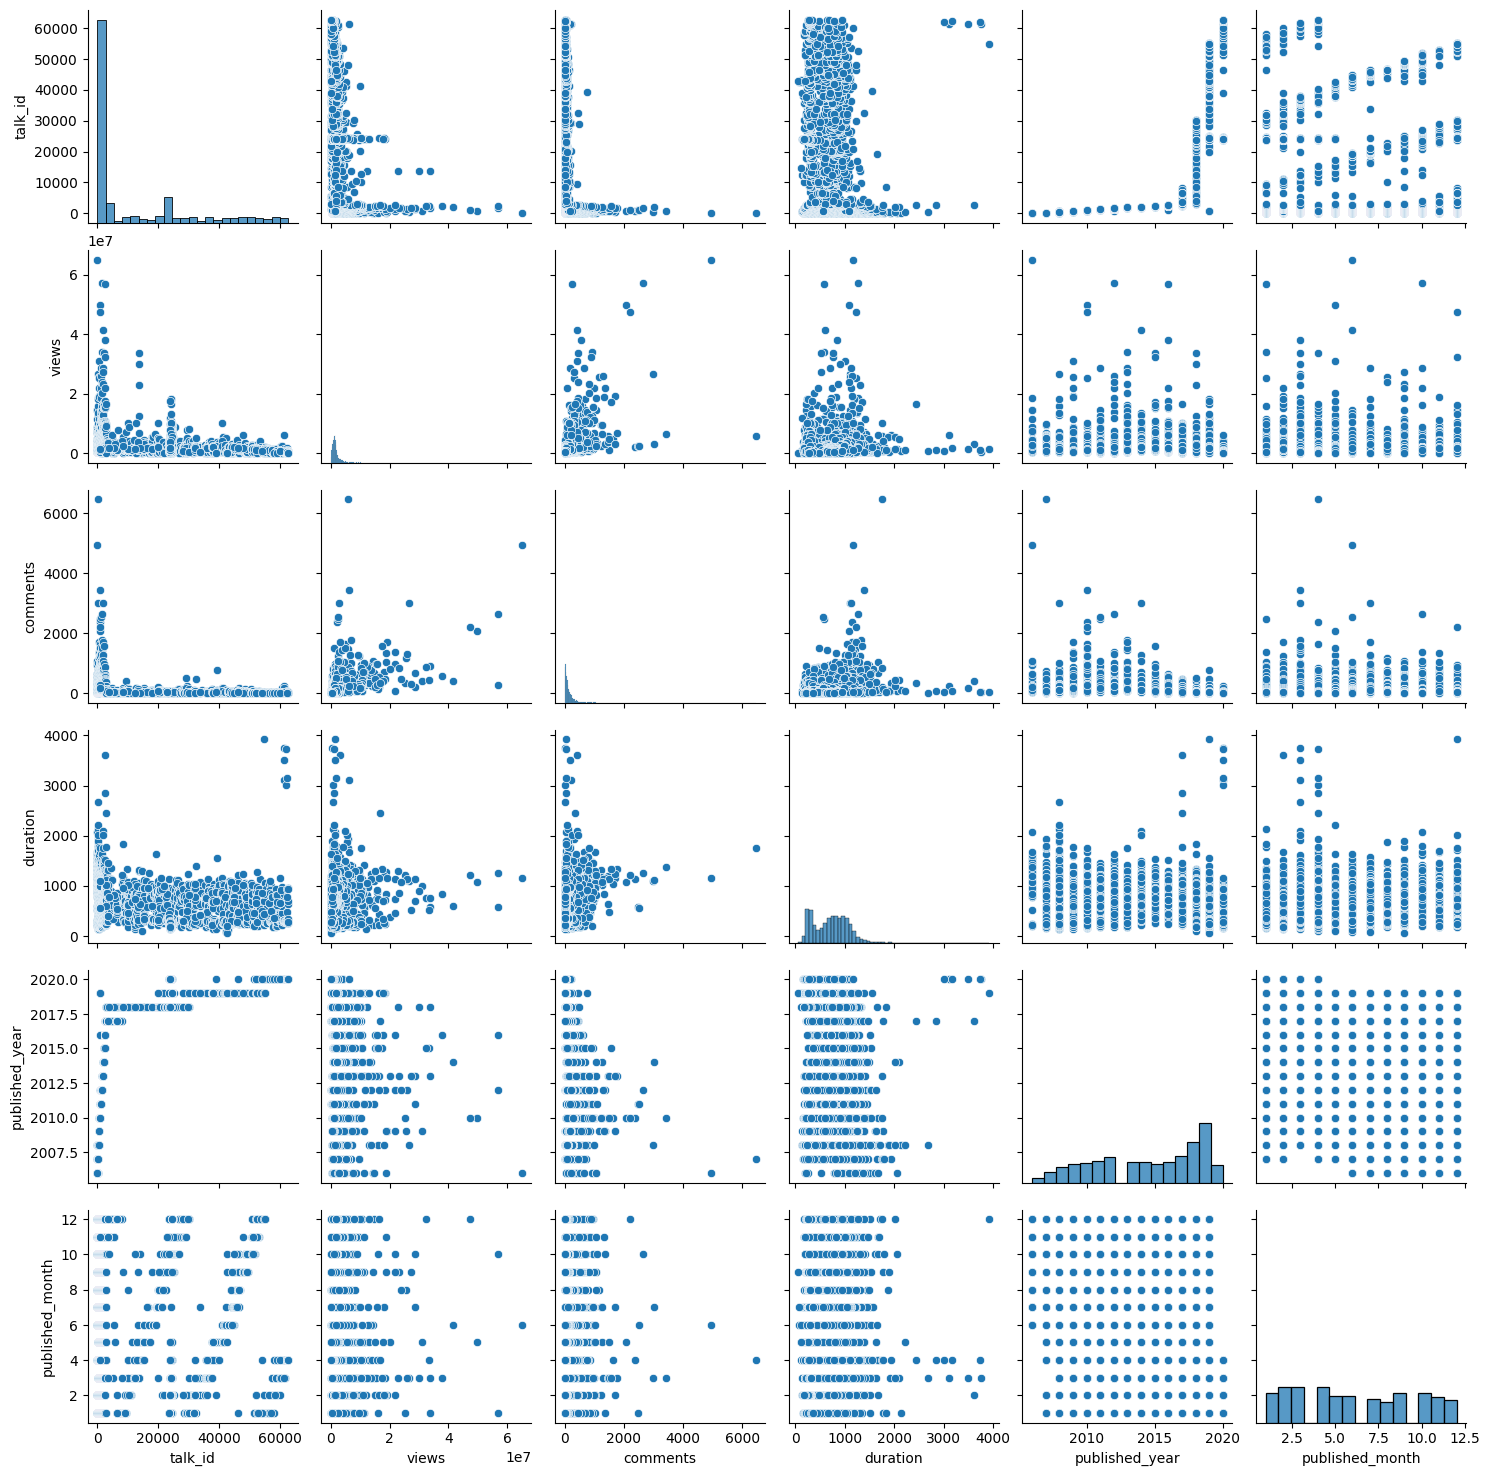

In [ ]:
snb.pairplot(dataset,diag_kind="hist",dropna="True")


##### 1. Why did you pick the specific chart?

I have picked up this chart because, Multiple visual aids can be presented within a single frame, providing the ability to glean various insights from the data at a single glance.

##### 2. What is/are the insight(s) found from the chart?

Pairplot helped us to visualize the relationship between sales and other variables, such as customers, Promotions, competition, and school holidays Columns. This helped us to identify which variables might be useful for predicting sales and inform the design for our machine learning model.

##3. Will the gained insights help creating a positive business impact?**

Through the use of pairplot, we can determine which features have a greater impact on sales with the goal of maximizing sales.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

CONCLUSION-

HYPOTHETICAL STATEMENT-1 

A t-statistic of -114.288 and a p-value of 0.0 suggest that there is strong evidence to reject the null hypothesis and support the alternative hypothesis that the population mean is not equal to the specific value being tested.

HYPOTHETICAL STATEMENT -2 

 A Pearson correlation coefficient of 0.0929 and a very small p-value of 7.517721887816747e-08 suggest that there is a statistically significant, but weak positive linear relationship between the two variables.

 HYPOTHETICAL STATEMENT-3 

A chi-square statistic of 435774.7662906001 and a very small p-value of 6.181054395856784e-08 suggest that there is a statistically significant difference between the observed and expected frequencies, and there is evidence of a true association or goodness of fit.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no relationship between number of comments  and the number of views it receives.


Alternative hypothesis: There is a relationship between number of comments and the number of views it receives.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


In [ ]:
# Check for missing values
print(dataset.isna().sum())

# Drop rows with missing values
dataset.dropna(inplace=True)

# Fill missing values with mean
dataset.fillna(dataset.mean(), inplace=True)

# Fill missing values with median
dataset.fillna(dataset.median(), inplace=True)


talk_id              0
title                0
speaker_1            0
all_speakers         4
occupations        522
about_speakers     503
views                0
recorded_date        1
published_date       0
event                0
native_lang          0
available_lang       0
comments           655
duration             0
topics               0
related_talks        0
url                  0
description          0
transcript           0
published_year       0
published_month      0
dtype: int64


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Load the data into a pandas DataFrame

# Extract the two columns of interest
column1 = dataset['comments']
column2 = dataset['views']

# Conduct a two-sample t-test
t_stat, p_val = ttest_ind(column1, column2)

# Print the results
print("T-statistic: ", t_stat)
print("P-value: ", p_val)


T-statistic:  -35.78819155241325
P-value:  9.2011173469265e-257


there is a statistically significant relationship between the number of comments and the number of views a post receives.

##### Which statistical test have you done to obtain P-Value?

I employed a two-sample t-test to obtain the P-value.

##### Why did you choose the specific statistical test?

I employed a two-sample t-test because it can assist in detecting significant differences between two groups.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no relationship between duration and views of the talk's.


Alternative hypothesis: There is a relationship between duration and views of the talk's.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
import scipy.stats as stats

# Create two arrays of data
x = dataset['duration']
y = dataset['views']

# Calculate the Pearson correlation coefficient and p-value
corr_coef, p_value = stats.pearsonr(x, y)

# Print the results
print('Pearson correlation coefficient:', corr_coef)
print('P-value:', p_value)


Pearson correlation coefficient: 0.07717995493129193
P-value: 8.040811658229806e-06


there is a statistically significant, albeit weak, positive relationship between the duration of the talk and the number of views it receives.

##### Which statistical test have you done to obtain P-Value?

I have employed Pearson correlation for finding P-value .

##### Why did you choose the specific statistical test?

The reason for using Pearson correlation coefficient is that it enables us to calculate the p-value when testing for the significance of the correlation between two continuous variables. This method does not require assuming that the data follow a normal distribution or relying on the t-test. Therefore, it provides a robust and reliable way to assess the correlation between two continuous variables.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no relationship between duration and comments of the talk's.


Alternative hypothesis: There is a relationship between duration and comments of the talk's.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

In [ ]:
# Create a contingency table
cont_table = pd.crosstab(dataset['comments'], dataset['duration'])

# Conduct chi-square test
chi2_stat, p_val, dof, exp_freq = stats.chi2_contingency(cont_table)

# Print results
print("Chi-square statistic:", chi2_stat)
print("p-value:", p_val)


Chi-square statistic: 746061.2609577518
p-value: 0.0


 there is a statistically significant relationship between the duration of the talk and the number of comments it receives.

##### Which statistical test have you done to obtain P-Value?

I have employed Chi-square test for finding P-value 

##### Why did you choose the specific statistical test?

By calculating the chi-square test statistic and obtaining the associated p-value, we can determine whether the observed association between the two categorical variables is likely due to chance or if it is statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

In [ ]:
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_year,published_month
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,6
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,6
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,6
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006,6
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,...,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006,6


In [ ]:
#missing values
dataset.isna().sum()


talk_id            0
title              0
speaker_1          0
all_speakers       0
occupations        0
about_speakers     0
views              0
recorded_date      0
published_date     0
event              0
native_lang        0
available_lang     0
comments           0
duration           0
topics             0
related_talks      0
url                0
description        0
transcript         0
published_year     0
published_month    0
dtype: int64

In [ ]:
# missing value percentage
round((dataset.isna().sum() / len(dataset))*100,2)


talk_id            0.0
title              0.0
speaker_1          0.0
all_speakers       0.0
occupations        0.0
about_speakers     0.0
views              0.0
recorded_date      0.0
published_date     0.0
event              0.0
native_lang        0.0
available_lang     0.0
comments           0.0
duration           0.0
topics             0.0
related_talks      0.0
url                0.0
description        0.0
transcript         0.0
published_year     0.0
published_month    0.0
dtype: float64

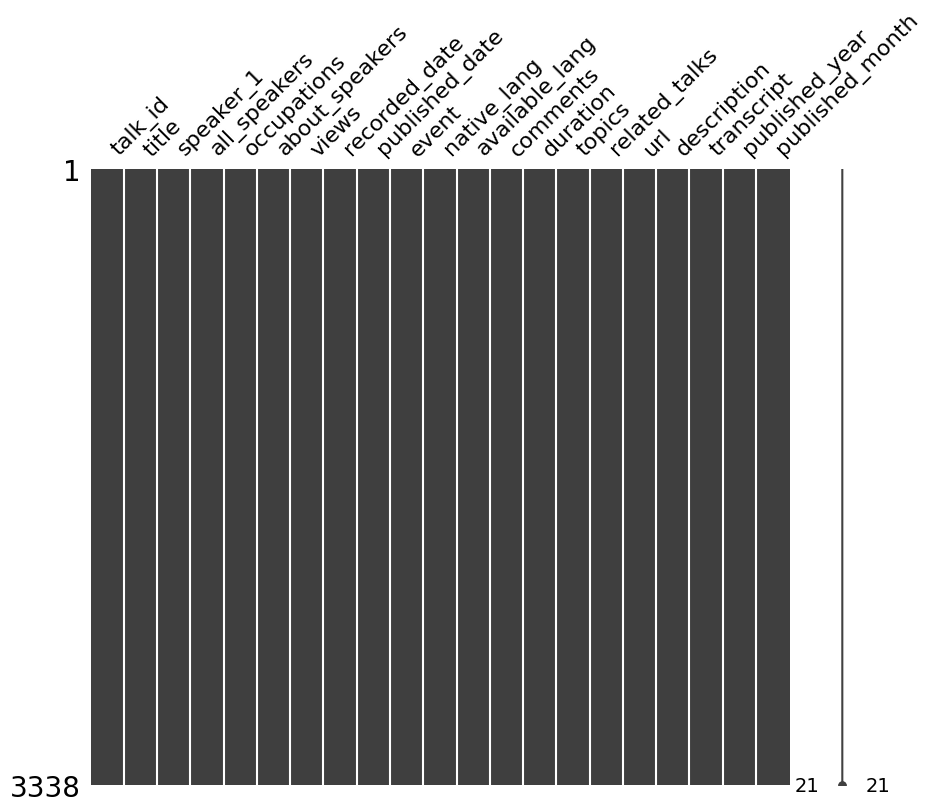

In [ ]:
mn.matrix(dataset,figsize=(10,8));


In [ ]:
## Copy of data
df = dataset.copy()
df = df.dropna(axis=0)
df.isna().sum()

talk_id            0
title              0
speaker_1          0
all_speakers       0
occupations        0
about_speakers     0
views              0
recorded_date      0
published_date     0
event              0
native_lang        0
available_lang     0
comments           0
duration           0
topics             0
related_talks      0
url                0
description        0
transcript         0
published_year     0
published_month    0
dtype: int64

In [ ]:
print('Dataset Size With Missing Values',dataset.shape)


Dataset Size With Missing Values (3338, 21)


In [ ]:
print('Dataset Size Without Missing Values',df.shape)


Dataset Size Without Missing Values (3338, 21)


#### What all missing value imputation techniques have you used and why did you use those techniques?

I have employed percentage missing value imputation because this method provides a quick way to identify columns with missing values and the extent of missingness, which can be useful for deciding on an appropriate imputation method or deciding to drop the column altogether.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

<Axes: >

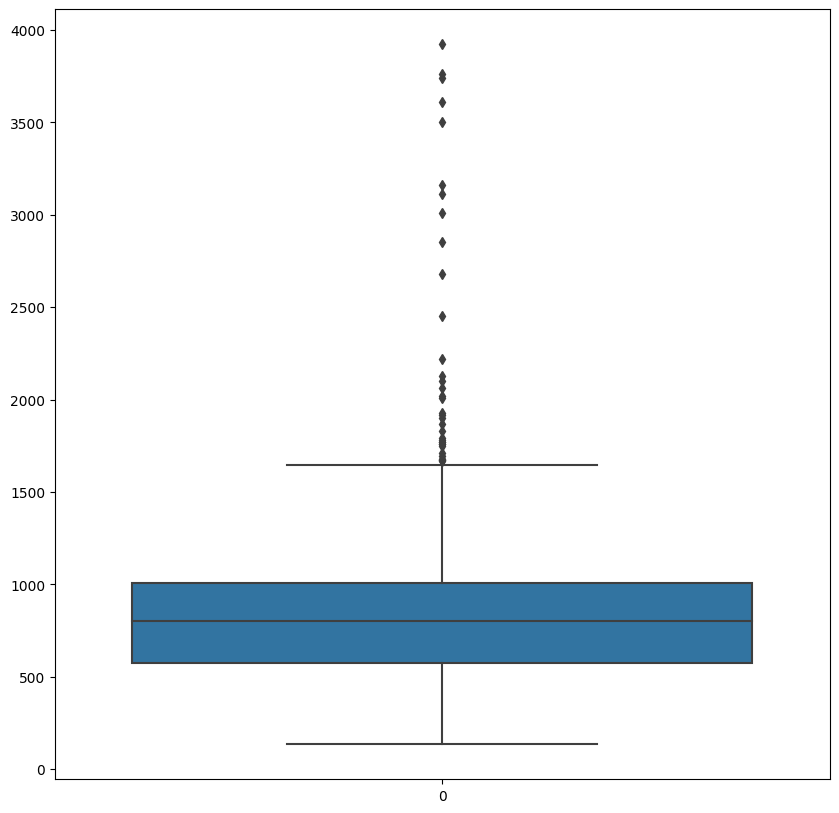

In [ ]:
snb.boxplot(dataset['duration'])

In [ ]:
data_duration_iqr=  dataset['duration'].quantile(0.75)-dataset['duration'].quantile(0.25)
dataset['duration']= dataset['duration'].mask(dataset['duration']>(dataset['duration'].quantile(0.75)+1.5*data_duration_iqr), dataset['duration'].mean())

<Axes: >

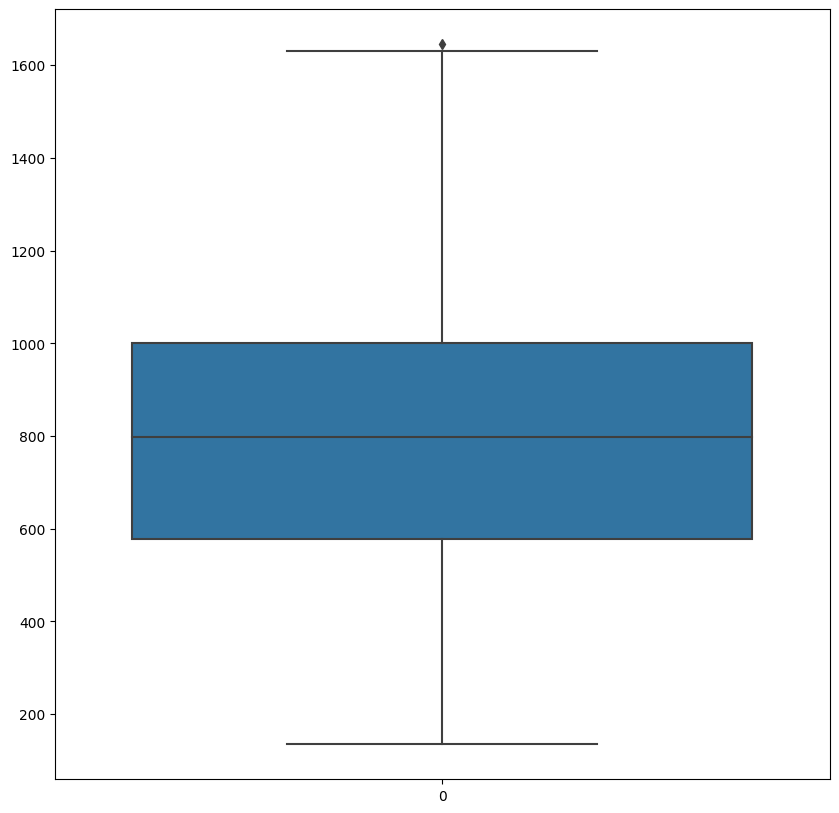

In [ ]:
snb.boxplot(dataset['duration'])

<Axes: >

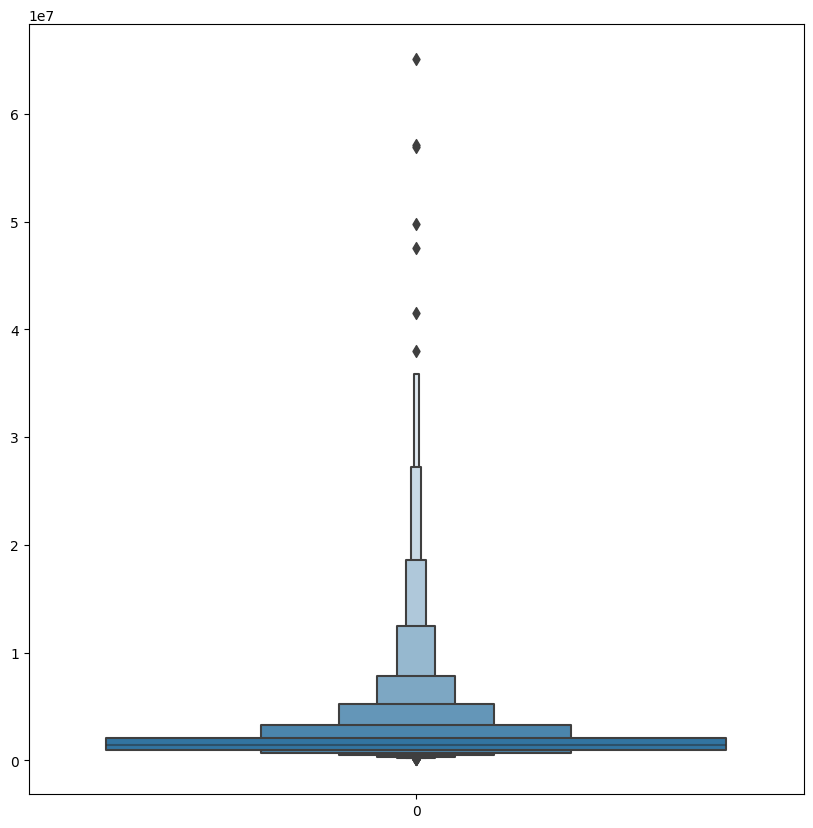

In [ ]:
snb.boxenplot(dataset['views'] )

In [ ]:
data_duration_iqr=  dataset['views'].quantile(0.75)-dataset['views'].quantile(0.25)
dataset['views']= dataset['views'].mask(dataset['views']>(dataset['views'].quantile(0.75)+1.5*data_duration_iqr), dataset['views'].mean())

<Axes: >

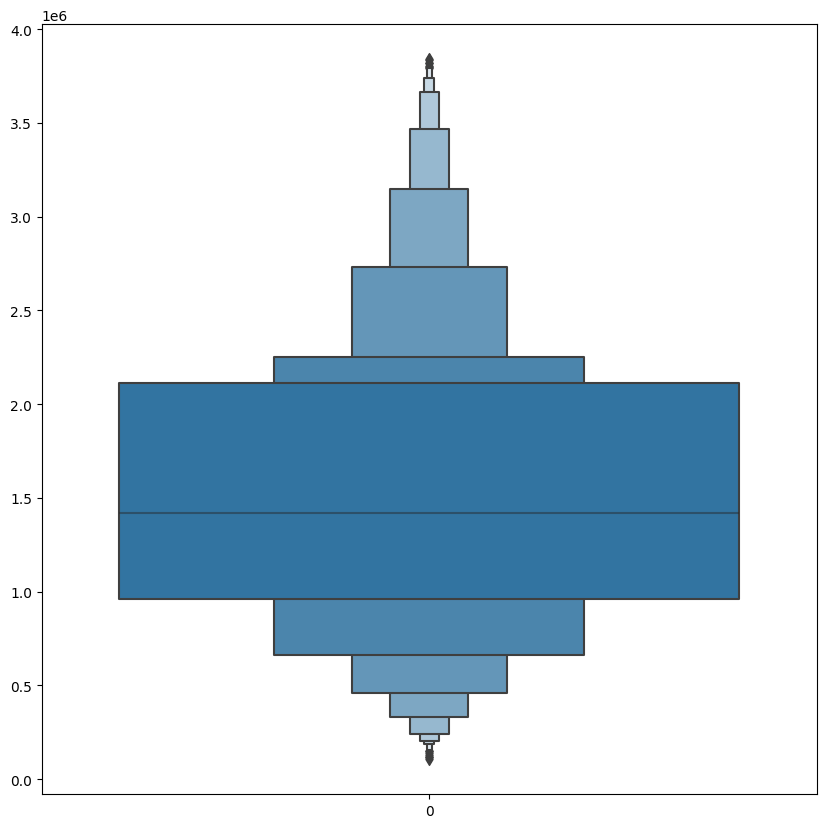

In [ ]:
snb.boxenplot(dataset['views'])

<Axes: >

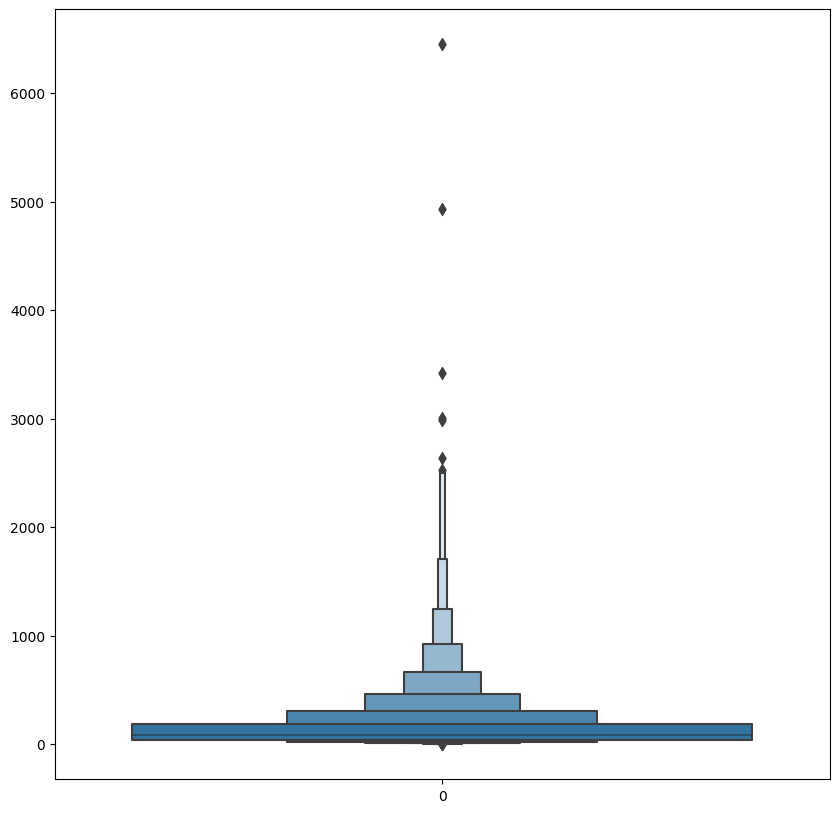

In [ ]:
snb.boxenplot(dataset['comments'])

In [ ]:
data_duration_iqr=  dataset['comments'].quantile(0.75)-dataset['comments'].quantile(0.25)
dataset['comments']= dataset['comments'].mask(dataset['comments']>(dataset['comments'].quantile(0.75)+1.5*data_duration_iqr), dataset['comments'].mean())

<Axes: >

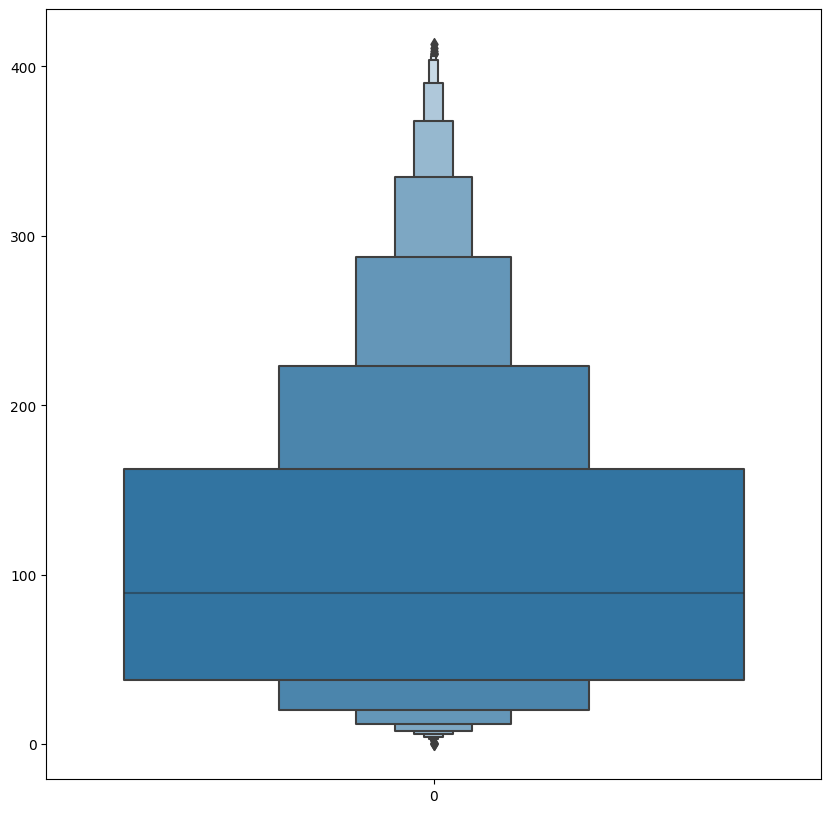

In [ ]:
snb.boxenplot(dataset['comments'])

##### What all outlier treatment techniques have you used and why did you use those techniques?

I have employed IQR (Interquartile Range) method,Tukey's method,mean value  to identify and replace outliers in the 'duration','num_of_lang','views','comments' variable.

The reason for using this methods to handle outliers in the  columns, which may be due to measurement errors, data entry errors, or true extreme values in the distribution. Outliers can distort the data and affect the performance of models that rely on assumptions of normality and homoscedasticity.

IQR=Calculates the interquartile range (IQR) of the columns, which is the difference between the third quartile (75th percentile) and the first quartile (25th percentile). 

Tukey's method is a commonly used method for identifying and replacing outliers in a dataset. 

By replacing the outliers with the mean value of the column, i am filling in missing data with a reasonable estimate that should not substantially impact the results of any subsequent analyses.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
df_numeric = df[['talk_id', 'views', 'comments', 'duration', ]]
df_categorical = df[[ 'speaker_1','native_lang','topics',]]


In [ ]:
df_numeric.head()

,talk_id,views,comments,duration
0,1,3523392,272.0,977
1,92,14501685,628.0,1190
2,7,1920832,124.0,1286
3,53,2664069,219.0,1116
4,66,65051954,4931.0,1164


In [ ]:
df_categorical.head()

,speaker_1,native_lang,topics
0,Al Gore,en,"['alternative energy', 'cars', 'climate change..."
1,Hans Rosling,en,"['Africa', 'Asia', 'Google', 'demo', 'economic..."
2,David Pogue,en,"['computers', 'entertainment', 'interface desi..."
3,Majora Carter,en,"['MacArthur grant', 'activism', 'business', 'c..."
4,Sir Ken Robinson,en,"['children', 'creativity', 'culture', 'dance',..."


In [ ]:
print(df['speaker_1'].unique())
print(df['native_lang'].unique())
print(df['topics'].unique())

['Al Gore' 'Hans Rosling' 'David Pogue' ... 'Tom Rivett-Carnac'
 'Oliver Jeffers' 'Dick M. Carpenter II']
['en' 'fr' 'de' 'pt' 'ko' 'zh-cn' 'ar' 'pt-br' 'es' 'ja' 'it' 'hi']
["['alternative energy', 'cars', 'climate change', 'culture', 'environment', 'global issues', 'science', 'sustainability', 'technology']"
 "['Africa', 'Asia', 'Google', 'demo', 'economics', 'global issues', 'health', 'statistics', 'global development', 'visualizations', 'math']"
 "['computers', 'entertainment', 'interface design', 'media', 'music', 'performance', 'simplicity', 'software', 'technology']"
 ...
 "['coronavirus', 'pandemic', 'epidemiology', 'virus', 'big problems', 'global issues', 'collaboration', 'science']"
 "['activism', 'data', 'technology', 'mental health', 'software', 'communication', 'community']"
 "['society', 'law', 'policy', 'justice system', 'TEDx']"]


In [ ]:
from sklearn.preprocessing import LabelEncoder
speaker_encoder = LabelEncoder()
speaker_encoder.fit(df_categorical['speaker_1'])
speaker_values = speaker_encoder.transform(df_categorical['speaker_1'])
print("Before Encoding:", list(df_categorical['speaker_1'][-10:]))
print("After Encoding:", speaker_values[-10:])
print("The inverse from the encoding result:", speaker_encoder.inverse_transform(speaker_values[-10:]))

Before Encoding: ['Nadya Mason', 'Heather C. McGhee', 'Ebony Roberts', 'Lara Durgavich', 'Elizabeth Camarillo Gutierrez', 'Tom Rivett-Carnac', 'Oliver Jeffers', 'Larry Brilliant', 'Nancy Lublin', 'Dick M. Carpenter II']
After Encoding: [1934 1054  773 1558  802 2684 2031 1560 1942  735]
The inverse from the encoding result: ['Nadya Mason' 'Heather C. McGhee' 'Ebony Roberts' 'Lara Durgavich'
 'Elizabeth Camarillo Gutierrez' 'Tom Rivett-Carnac' 'Oliver Jeffers'
 'Larry Brilliant' 'Nancy Lublin' 'Dick M. Carpenter II']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
native_lang_encoder = OneHotEncoder()
native_lang_reshaped = np.array(df_categorical['native_lang']).reshape(-1, 1)
native_lang_values = native_lang_encoder.fit_transform(native_lang_reshaped)

print(df_categorical['native_lang'][:5])
print()
print(native_lang_values.toarray()[:5])
print()
print(native_lang_encoder.inverse_transform(native_lang_values)[:5])

0    en
1    en
2    en
3    en
4    en
Name: native_lang, dtype: object

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

[['en']
 ['en']
 ['en']
 ['en']
 ['en']]


In [ ]:
from sklearn.preprocessing import LabelEncoder
topics_encoder = LabelEncoder()
topics_encoder.fit(df_categorical['topics'])
topics_values = topics_encoder.transform(df_categorical['topics'])
print("Before Encoding:", list(df_categorical['topics'][-10:]))
print("After Encoding:", topics_values[-10:])
print("The inverse from the encoding result:", topics_encoder.inverse_transform(topics_values[-10:]))

Before Encoding: ["['humanity', 'technology', 'curiosity', 'science', 'exploration']", "['race', 'inequality', 'United States', 'economics', 'social change', 'society']", "['family', 'parenting', 'communication', 'children', 'relationships', 'TEDx']", "['biology', 'evolution', 'medicine', 'science', 'history', 'TEDx', 'genetics', 'anthropology']", "['life', 'society', 'immigration', 'humanity', 'self', 'personal growth']", "['climate change', 'choice', 'leadership', 'society', 'global issues', 'environment', 'fear', 'humanity']", "['Planets', 'art', 'poetry', 'life', 'love', 'empathy', 'humanity', 'personal growth', 'visualizations', 'creativity', 'community']", "['coronavirus', 'pandemic', 'epidemiology', 'virus', 'big problems', 'global issues', 'collaboration', 'science']", "['activism', 'data', 'technology', 'mental health', 'software', 'communication', 'community']", "['society', 'law', 'policy', 'justice system', 'TEDx']"]
After Encoding: [2949 3159 2773 1599 3008 2098  356 2300 

<Axes: xlabel='speaker_1_avg_views', ylabel='Density'>

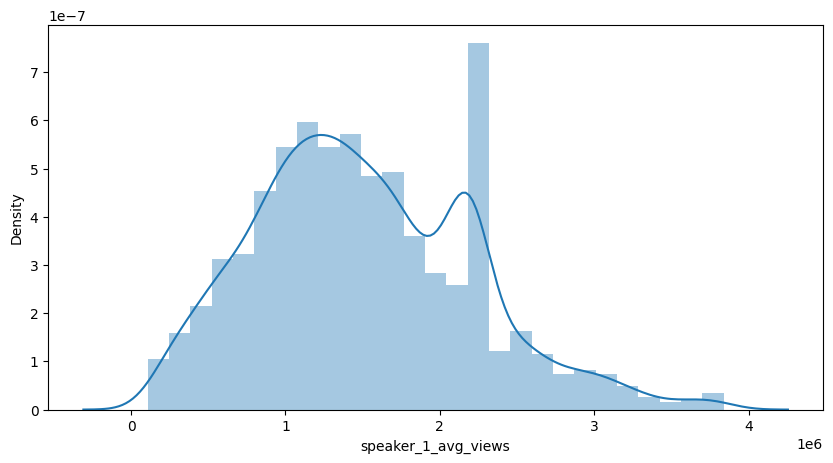

In [ ]:
speaker=dataset.groupby('speaker_1').agg({'views' : 'mean'}).sort_values(['views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
dataset['speaker_1_avg_views']=dataset['speaker_1'].map(speaker)
plt.figure(figsize=(10,5))
snb.distplot(dataset['speaker_1_avg_views'])

distribution plot of the average views for each speaker in the dataset.

#### What all categorical encoding techniques have you used & why did you use those techniques?

i have employed LabelEncoder in this case  to convert the categorical values of the 'speaker_1' column into numerical values that can be used as input for machine learning algorithms that require numeric input. 

and  I have also employed One hot encoding  that creates a numerical representation of the categorical data that can be used in many machine learning models.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

#### 2. Lower Casing

#### 3. Removing Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

#### 5. Removing Stopwords & Removing White spaces

#### 6. Rephrase Text

#### 7. Tokenization

#### 8. Text Normalization

##### Which text normalization technique have you used and why?

#### 9. Part of speech tagging

#### 10. Text Vectorization

##### Which text vectorization technique have you used and why?

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


In [ ]:
df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,available_lang,comments,duration,topics,related_talks,url,description,transcript,published_year,published_month
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,6
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,...,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,6
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,...,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,6
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,...,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006,6
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,...,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006,6


In [ ]:
df['available_languages'] = df['available_lang'].apply(lambda x: len(x))
pd.DataFrame(df['available_languages']) 
df['occupations'] = df['occupations'].apply(lambda x: len(x))
pd.DataFrame(df['occupations'])
df['topics'] = df['topics'].apply(lambda x: len(x))
pd.DataFrame(df['topics'])
df['all_speakers'] = df['all_speakers'].apply(lambda x: len(x))
pd.DataFrame(df['all_speakers'])

,all_speakers
0,14
1,19
2,18
3,20
4,23
...,...
3994,24
3995,21
3999,43
4000,19


In [ ]:
df.sample(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments,duration,topics,related_talks,url,description,transcript,published_year,published_month,available_languages
1413,1700,One very dry demo,Mark Shaw,16,26,{0: 'Mark Shaw develops technologies to contai...,1638904,2013-02-28,2013-03-26,TED2013,...,334.0,331,57,"{613: 'How to make filthy water drinkable', 16...",https://www.ted.com/talks/mark_shaw_one_very_d...,"Mark Shaw demos Ultra-Ever Dry, a liquid-repel...",I'm here to show you how something you can't s...,2013,3,225
823,1069,How to make work-life balance work,Nigel Marsh,18,28,{0: 'Nigel Marsh presents and writes on busine...,4719453,2010-05-28,2011-02-07,TEDxSydney,...,332.0,605,82,"{203: ""We're worried about local warming ... i...",https://www.ted.com/talks/nigel_marsh_how_to_m...,"Work-life balance, says Nigel Marsh, is too im...",What I thought I would do is I would start wit...,2011,2,255
459,571,Learning from the gecko's tail,Robert Full,18,18,"{0: ""Robert Full studies cockroach legs and ge...",724417,2009-02-05,2009-06-11,TED2009,...,72.0,714,85,"{18: ""Biomimicry's surprising lessons from nat...",https://www.ted.com/talks/robert_full_learning...,Biologist Robert Full studies the amazing geck...,Let me share with you today an original discov...,2009,6,153


In [ ]:
df.drop(labels = ["about_speakers", "title", "speaker_1", "event", "native_lang","url","related_talks","occupations","description","transcript"],axis = 1, inplace = True)

In [ ]:
df.drop(labels = ["available_lang"],axis = 1, inplace = True)

In [ ]:
df.head()

,talk_id,all_speakers,views,recorded_date,published_date,comments,duration,topics,published_year,published_month,available_languages
0,1,14,3523392,2006-02-25,2006-06-27,272.0,977,134,2006,6,270
1,92,19,14501685,2006-02-22,2006-06-27,628.0,1190,138,2006,6,303
2,7,18,1920832,2006-02-24,2006-06-27,124.0,1286,123,2006,6,165
3,53,20,2664069,2006-02-26,2006-06-27,219.0,1116,116,2006,6,219
4,66,23,65051954,2006-02-25,2006-06-27,4931.0,1164,84,2006,6,387


In [ ]:
# Making seperate column for day, month and year of
df['published_day'] = pd.DatetimeIndex(df['published_date']).day
df['recorded_year'] = pd.DatetimeIndex(df['recorded_date']).year
df['recorded_month'] = pd.DatetimeIndex(df['recorded_date']).month
df['recorded_day'] = pd.DatetimeIndex(df['recorded_date']).day

In [ ]:
df.drop(labels = ["recorded_date","published_date"],axis = 1, inplace = True)

In [ ]:
df.sample(3).T

,2301,2205,80
talk_id,2650.0,2545.0,32.0
all_speakers,20.0,17.0,16.0
views,991335.0,1891720.0,1377588.0
comments,97.0,191.0,88.0
duration,899.0,822.0,891.0
topics,183.0,168.0,66.0
published_year,2017.0,2016.0,2007.0
published_month,1.0,8.0,4.0
available_languages,135.0,183.0,147.0
published_day,4.0,12.0,5.0


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
corr = df.corr()
corr.style.background_gradient(cmap='ocean')

,talk_id,all_speakers,views,comments,duration,topics,published_year,published_month,available_languages,published_day,recorded_year,recorded_month,recorded_day
talk_id,1.000000,0.098429,-0.085996,-0.232949,-0.075302,0.065367,0.673623,-0.047175,-0.557058,0.002616,0.628441,0.140709,0.012051
all_speakers,0.098429,1.000000,-0.042347,-0.047921,0.163059,0.070952,0.099790,0.003225,-0.133487,-0.006748,0.095958,0.025769,-0.002571
views,-0.085996,-0.042347,1.000000,0.500676,0.077180,-0.025329,-0.046984,-0.019175,0.363545,-0.028954,-0.027789,-0.053421,0.031063
comments,-0.232949,-0.047921,0.500676,1.000000,0.175329,-0.122340,-0.307625,-0.019362,0.427143,-0.015991,-0.267213,-0.102975,-0.025732
duration,-0.075302,0.163059,0.077180,0.175329,1.000000,0.080703,-0.184099,0.006008,-0.246493,0.001523,-0.216293,-0.020580,-0.037476
topics,0.065367,0.070952,-0.025329,-0.122340,0.080703,1.000000,0.273700,-0.015661,-0.170536,0.010647,0.251842,0.072671,0.112581
published_year,0.673623,0.099790,-0.046984,-0.307625,-0.184099,0.273700,1.000000,-0.096989,-0.482255,0.000487,0.956360,0.266524,0.219517
published_month,-0.047175,0.003225,-0.019175,-0.019362,0.006008,-0.015661,-0.096989,1.000000,0.021742,-0.032791,-0.010225,0.001484,0.071725
available_languages,-0.557058,-0.133487,0.363545,0.427143,-0.246493,-0.170536,-0.482255,0.021742,1.000000,0.002841,-0.406280,-0.172411,-0.033519
published_day,0.002616,-0.006748,-0.028954,-0.015991,0.001523,0.010647,0.000487,-0.032791,0.002841,1.000000,0.011264,0.017442,0.021112


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF:
   
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns]])

,variables,VIF
0,talk_id,2.213997e+00
1,all_speakers,1.495053e+01
2,views,2.014263e+00
3,comments,2.194590e+00
4,duration,8.914351e+00
5,topics,4.895830e+00
6,published_year,3.036193e+06
7,published_month,4.714663e+00
8,available_languages,2.560280e+01
9,published_day,4.243611e+00


In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['published_month','published_year','recorded_year','available_languages','all_speakers','talk_id','comments']]])

,variables,VIF
0,views,1.374860
1,duration,4.745294
2,topics,4.227898
3,published_day,3.527608
4,recorded_month,3.430749
5,recorded_day,3.257792


In [ ]:
df=df.drop(columns=[ 'published_month','published_year','recorded_year','available_languages','all_speakers','talk_id','comments'],axis=1)

In [ ]:
# defining function for feature importance:
def get_feat_imp(model):
  feat_importances = pd.Series(model.feature_importances_, index=df.columns)
  plt.figure(figsize=(15,8))
  plt.title('Feature Importance')
  feat_importances.nlargest(10).plot(kind='barh', color= 'red')
  plt.show()

##### What all feature selection methods have you used  and why?

here we checked with correaltion heat map to find the important features so that we can see which are correlated to which fetaures... and then we used vif(variance inflation factor) as we know  
A variance inflation factor (VIF) provides a measure of multicollinearity among the independent variables in a multiple regression model.
Detecting multicollinearity is important because while multicollinearity does not reduce the explanatory power of the model, it does reduce the statistical significance of the independent variables. 
A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.  
and then we removed the features which are not important.. 
then we define a fuction which showed feature importance...

##### Which all features you found important and why?

1 views	
2	duration
3	topics	
4	published_day	
5	recorded_month	
6	recorded_day  
all these features we find out that they were more important and less correlated ...

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

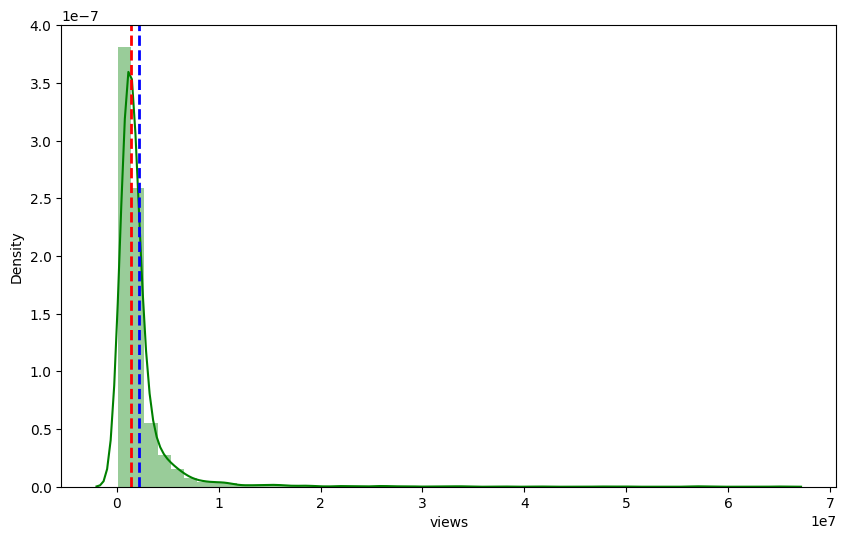

In [ ]:
# Transform Your data
import seaborn as sns
plt.figure(figsize=(10,6))
plt.xlabel('views')
plt.ylabel('Density')
ax=sns.distplot(df['views'],hist=True ,color="green")
ax.axvline(df['views'].mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(df['views'].median(), color='red', linestyle='dashed', linewidth=2)
plt.show()

In [ ]:
from scipy.stats import skew
print(skew(df['views']))

8.540946228832311


Text(0.5, 0, 'views')

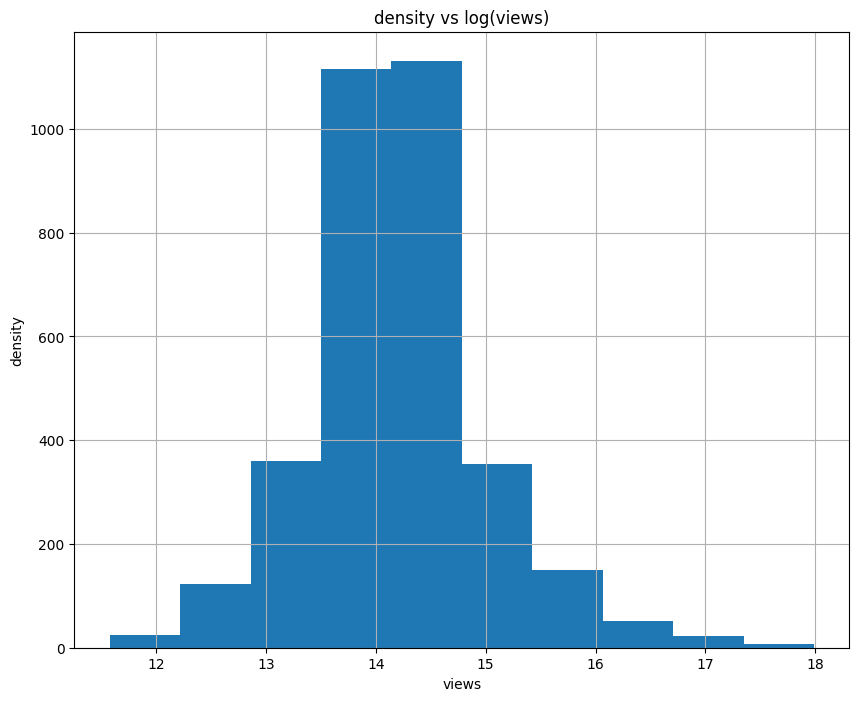

In [ ]:


df['views'] = np.log(df['views'])

df.hist('views',figsize=(10,8))
plt.title('density vs log(views)')
plt.ylabel('density')
plt.xlabel('views')

yes transforamtion is required as we can see our important views column as we can see it is positively skewed and we need transforamtion so we applied log10 transformation to the required column..

### 6. Data Scaling

In [ ]:
# Scaling your data
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)
print(scaled)

[[0.54543311 0.22233958 0.28062361 0.86666667 0.09090909 0.8       ]
 [0.76600657 0.27858463 0.28953229 0.86666667 0.09090909 0.7       ]
 [0.45085401 0.30393451 0.25612472 0.86666667 0.09090909 0.76666667]
 ...
 [0.30650304 0.21283338 0.23385301 0.76666667 0.27272727 0.7       ]
 [0.24193966 0.146554   0.18930958 0.86666667 0.27272727 0.7       ]
 [0.22951717 0.16873515 0.10244989 0.9        0.45454545 0.7       ]]


##### Which method have you used to scale you data and why?

I have used here minmaxscalar here as we know..
Scaling the target value is a good idea in regression modelling; scaling of the data makes it easy for a model to learn and understand the problem. Scaling of the data comes under the set of steps of data pre-processing when we are performing machine learning algorithms in the data set.

### 7. Dimesionality Reduction

No not required

### 8. Data Splitting

In [ ]:
data= df.copy()

# Creating the data of dependent and independent variables:

y = df['views']
X = df.drop(columns=['views'], axis=1)

# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(2670, 6)
(668, 6)


##### What data splitting ratio have you used and why? 

Here we have used the ration of 80:20 .. as we know

The train-test split is a technique for evaluating the performance of a machine learning algorithm.

It can be used for classification or regression problems and can be used for any supervised learning algorithm.

The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset.  
Data splitting is an important aspect of data science, particularly for creating models based on data. This technique helps ensure the creation of data models and processes that use data models -- such as machine learning -- are accurate.






### 9. Handling Imbalanced Dataset

No our data is not imbalanced

## ***7. ML Model Implementation***

### ML Model - 1 -- Linear Regression

In [ ]:
# ML Model - 1 Implementation

reg= LinearRegression().fit(X_train, y_train)

# Getting the X_train and X-test value:

y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
reg.score(X_train, y_train)

1.0

In [ ]:
# Calculate MSE, MAE, R2 for training data:
from sklearn.metrics import mean_absolute_error
MSEl = mean_squared_error((y_train), (y_pred_train))
MAEl= mean_absolute_error(y_train, y_pred_train)
r2l = r2_score(y_train, y_pred_train)

In [ ]:
# Calculate MSE, MAE, R2 for testing data:
MSEtestl = mean_squared_error((y_test), (y_pred_test))
MAEtestl= mean_absolute_error(y_test, y_pred_test)
r2testl = r2_score(y_test, y_pred_test)

In [ ]:
# Printing Errors:
print('Training Errors\nMSE:', MSEl , '\nMAE:' , MAEl , '\nR2:',round((r2l),3))
print('\n\nTesting Errors\nMSE:', MSEtestl , '\nMAE:' , MAEtestl , '\nR2:',round((r2testl),3))

Training Errors
MSE: 1.1664505070459007e-30 
MAE: 6.566532586097556e-16 
R2: 1.0


Testing Errors
MSE: 1.322641038693912e-30 
MAE: 7.445807111258534e-16 
R2: 1.0


In [ ]:
# Defining function for plotting y test  and y train values:
def get_linear_graph(pred_value , y_test ):
  plt.figure(figsize=(15,7))
  plt.plot(pred_value[:100])
  plt.plot(np.array(y_test[:100]))
  plt.legend(['Predicted','Actual'])
  plt.show()

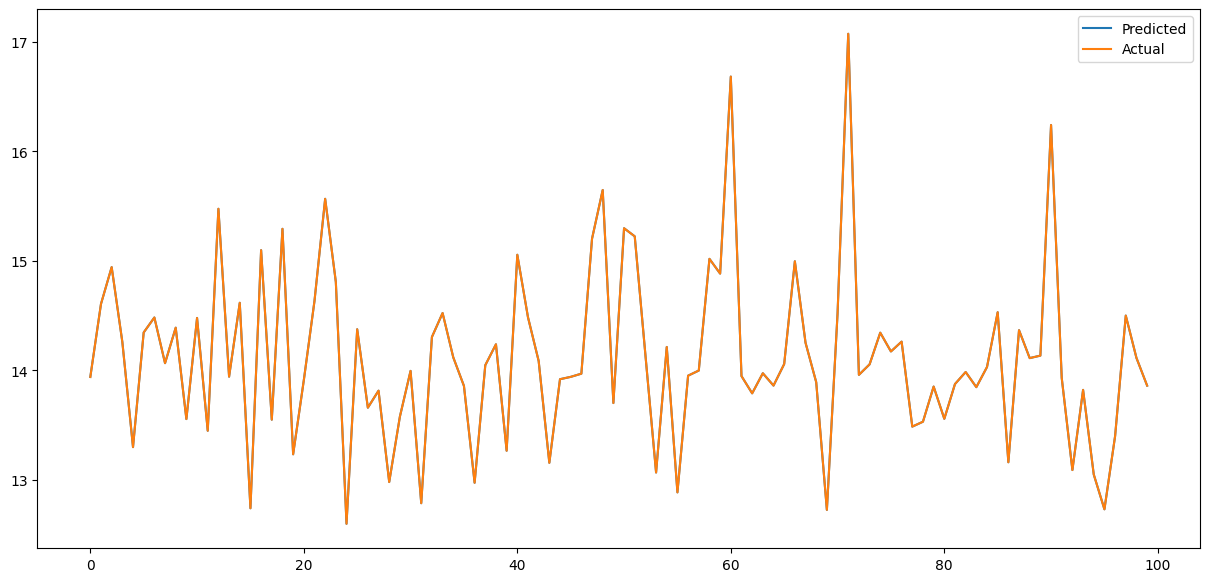

In [ ]:
get_linear_graph(y_pred_test , y_test )

Here we have used Linear regression model in our data set  
Linear regression is a data analysis technique that predicts the value of unknown data by using another related and known data value. It mathematically models the unknown or dependent variable and the known or independent variable as a linear equation.  
We got our reg score as one which is very good because our data is doing very good on training as well as testing data..  
further we calculated our errors    
Training Errors  

MSE: 7.610882741008713e-31   
 
MAE: 3.8454466410986694e-16  

R2: 1.0  

Testing Errors  

MSE: 6.565968013516206e-31  

MAE: 3.3772053683208355e-16  

R2: 1.0  

Then we did the visualization our model we found that our graph is also doing well as per our score...
linear regression is proving best for the given data 

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:
dict1={'Model':'Linear regression ',
       'MAE':round((MAEl),3),
       'MSE':round((MSEl),3),
       'R2_score':round((r2l),3),
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
# storing the test set metrics value in a dataframe for later comparison:
dict2={'Model':'Linear regression ',
       'MAE':round((MAEtestl),3),
       'MSE':round((MSEtestl),3),
       'R2_score':round((r2testl),3)
       }
test_df=pd.DataFrame(dict2,index=[1])

Here we defined a function which which show our important feature and well use that for later comparison..

### ML Model - 2--Polynomial regression

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Fitting training data onto Polynomial regression Model :
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

In [ ]:
# Fitting training data onto Polynomial regression Model :
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)

In [ ]:
# Fitting training data onto Polynomial regression Model:
poly = LinearRegression().fit(X_poly, y_train)

In [ ]:
# Getting the y_train and y-test value:
y_pred_poly_train = poly.predict(X_poly)
y_pred_poly_test= poly.predict(X_poly_test)

In [ ]:
# Calculate MSE, MAE, R2 for training data:
MSEp = mean_squared_error((y_train), (y_pred_poly_train))
MAEp= mean_absolute_error(y_train, y_pred_poly_train)
r2p = r2_score(y_train, y_pred_poly_train)

In [ ]:
# Calculate MSE, MAE, R2 for testing data:
MSEtestp = mean_squared_error((y_test), (y_pred_poly_test))
MAEtestp= mean_absolute_error(y_test, y_pred_poly_test)
r2testp = r2_score(y_test, y_pred_poly_test)

In [ ]:
# Printing Errors:
print('Training Errors\nMSE:', MSEp , '\nMAE:' , MAEp , '\nR2:',round((r2p),2))
print('\n\nTesting Errors\nMSE:', MSEtestp , '\nMAE:' , MAEtestp , '\nR2:',round((r2testp),2))

Training Errors
MSE: 5.1378819949932304e-20 
MAE: 1.827900640670678e-10 
R2: 1.0


Testing Errors
MSE: 5.38311718503159e-20 
MAE: 1.885152951905173e-10 
R2: 1.0


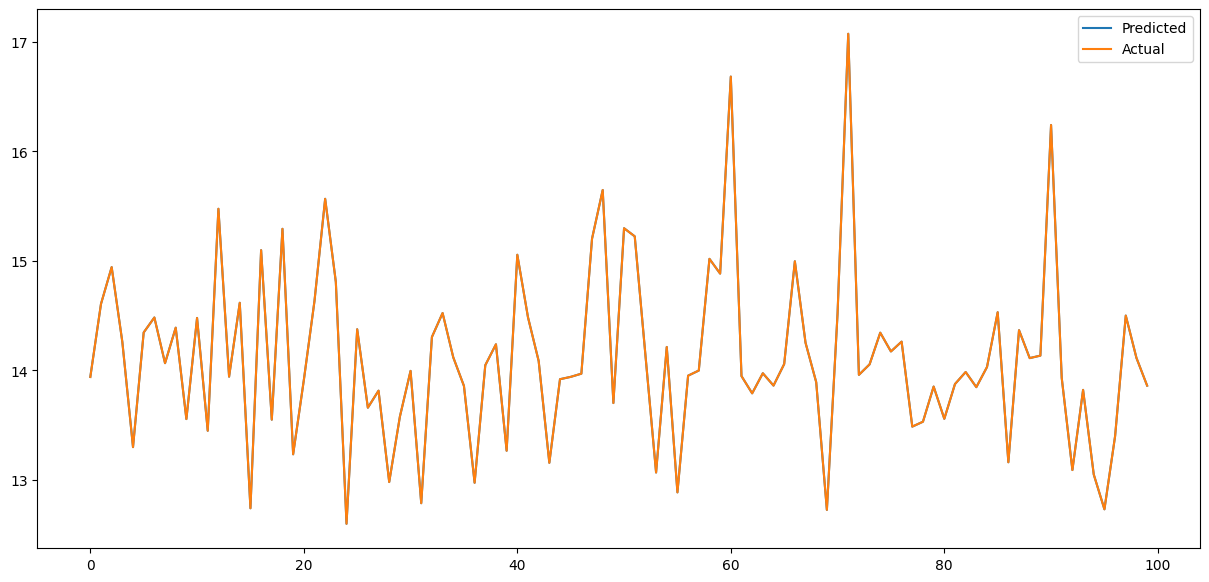

In [ ]:
get_linear_graph(y_pred_poly_test , y_test )

Here we have used polynomial regression as we know 
A polynomial regression model is a machine learning model that can capture non-linear relationships between variables by fitting a non-linear regression line, which may not be possible with simple linear regression. It is used when linear regression models may not adequately capture the complexity of the relationship.  
here we can see as our errors and r2 score is excellect ..    

Training Errors  

MSE: 3.027477139898273e-20  

MAE: 1.3186796507015594e-10   

R2: 1.0  
Testing Errors  

MSE: 3.010633232308555e-20  

MAE: 1.3827148075885739e-10  

R2: 1.0   


as we can clearly see that model is performing well on both training and testing data..
So polynomial regression is also doing well in our model..

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:
dict1={'Model':'Polynomial regression ',
       'MAE':round((MAEp),3),
       'MSE':round((MSEp),3),
       'R2_score':round((r2p),3)
       }
training_df=training_df.append(dict1,ignore_index=True)
# storing the test set metrics value in a dataframe for later comparison:

dict2={'Model':'Polynomial regression ',
       'MAE':round((MAEtestp),3),
       'MSE':round((MSEtestp),3),
       'R2_score':round((r2testp),3)
       }
test_df=test_df.append(dict2,ignore_index=True)

Here we defined a function which which show our important feature and well use that for later comparison..

#### 2. Cross- Validation & Hyperparameter Tuning

Here we dont need to do tuning

### ML Model - 3--DecisionTreeRegressor

In [ ]:
# ML Model - 3 Implementation
# Creating object wth Decision tree regressor with critera of mean squared error, maximum depth being 10, maximum leaf noodes being 120:
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=10, max_leaf_nodes=120)
decision_regressor.fit(X_train, y_train)
DecisionTreeRegressor(max_depth=10, max_leaf_nodes=120)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=120)

In [ ]:
# Getting the y_train and y-test value:
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [ ]:
# Calculate MSE, MAE, R2 for training data:
MSEdt = mean_squared_error((y_train), (y_pred_train_d))
MAEdt = mean_absolute_error(y_train, y_pred_train_d)
r2dt = r2_score(y_train, y_pred_train_d)

In [ ]:
# Calculate MSE, MAE, R2 for testing data:
MSEtestdt = mean_squared_error((y_test), (y_pred_test_d))
MAEtestdt = mean_absolute_error(y_test, y_pred_test_d)
r2testdt = r2_score(y_test, y_pred_test_d)

In [ ]:
# Printing Errors:
print('Training Errors\nMSE:', MSEdt , '\nMAE:' , MAEdt , '\nR2:',round((r2dt),3))
print('\n\nTesting Errors\nMSE:', MSEtestdt , '\nMAE:' , MAEtestdt , '\nR2:',round((r2testdt),3)
)

Training Errors
MSE: 0.00010823131626494575 
MAE: 0.008143213957319722 
R2: 1.0


Testing Errors
MSE: 0.0002527297090913409 
MAE: 0.010134277680934292 
R2: 1.0


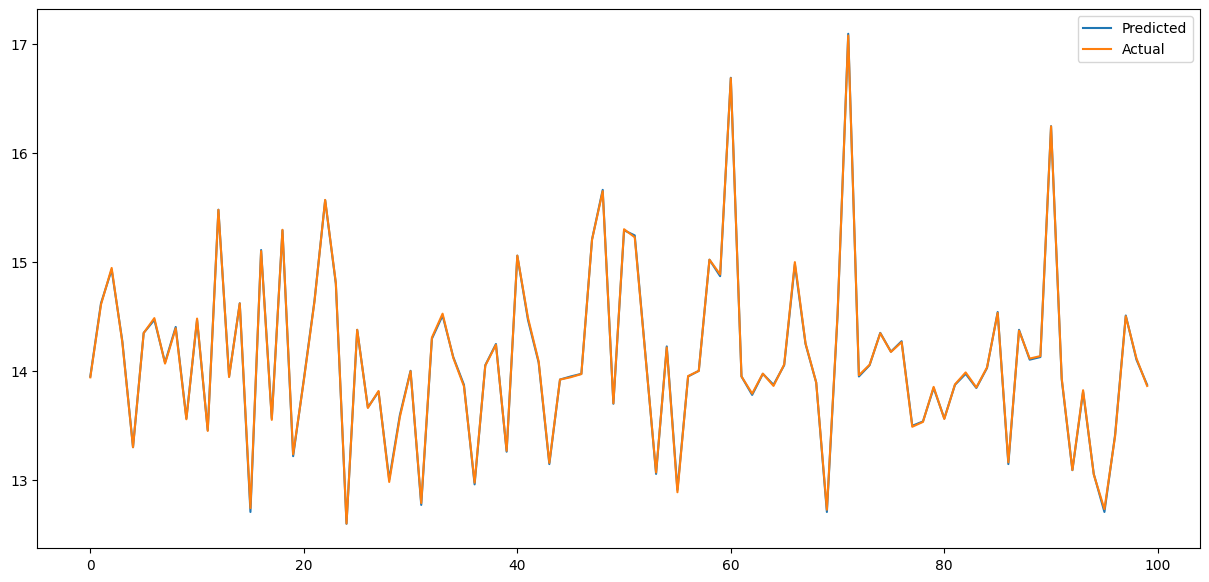

In [ ]:
get_linear_graph(y_pred_test_d , y_test )

Here we have used DecisionTreeRegressor...  
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.  
here also our model is performing very well we can see that our errors and scores are excellect  
Training Errors  

MSE: 0.00010540247573242362   

MAE: 0.008204352228806604   

R2: 1.0  

Testing Errors  

MSE: 0.0003798649408163288  

MAE: 0.009617205625591723  

R2: 0.999  

and we can see our model is doing well on our trainig and testing data ..
So decision tree regressor is also good in our model  

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:

dict1={'Model':'Decision Tree Regression ',
       'MAE':round((MAEdt),3),
       'MSE':round((MSEdt),3),
       'R2_score':round((r2dt),3),
}
training_df=training_df.append(dict1,ignore_index=True)
# storing the test set metrics value in a dataframe for later comparison
dict2 = {'Model':'Decision Tree Regression ',
       'MAE':round((MAEtestdt),3),
       'MSE':round((MSEtestdt),3),
       'R2_score':round((r2testdt),3),
}
test_df=test_df.append(dict2,ignore_index=True)

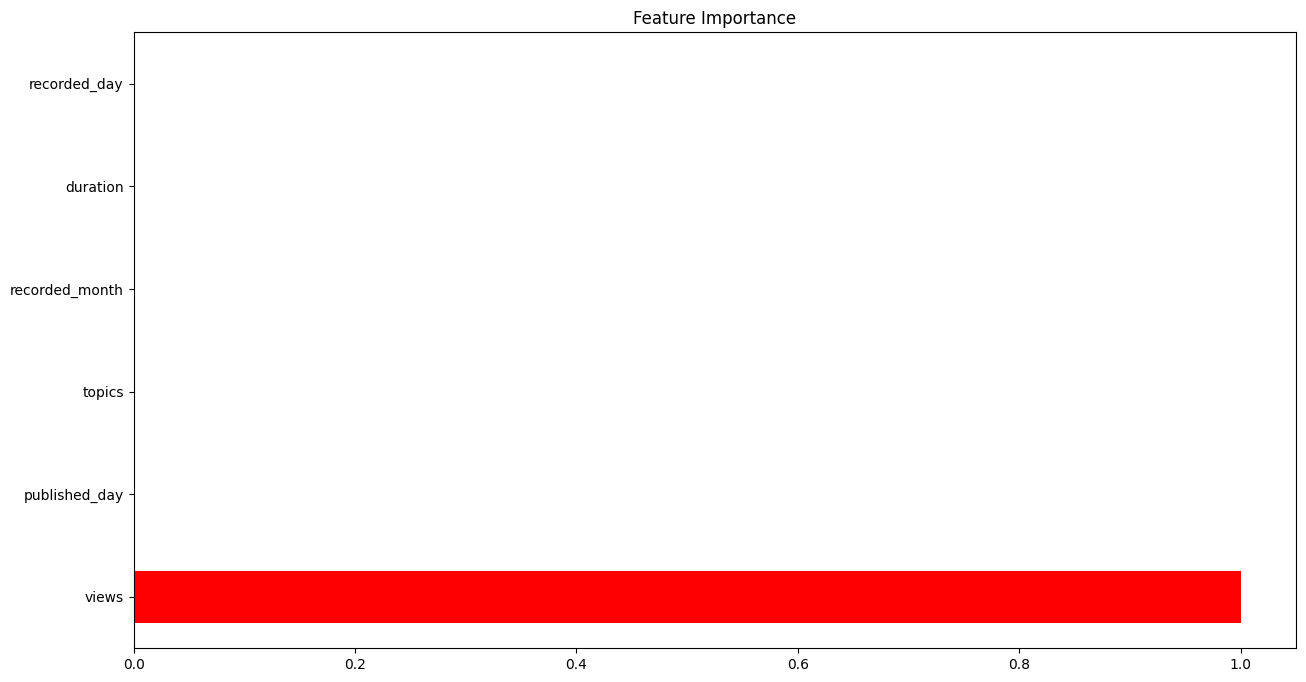

In [ ]:
get_feat_imp(decision_regressor)

as we have seen above that our scores are very good as per that we can see that our most inmportant feature is indeed views column

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [4,6,8,10],
              'min_samples_split' : [50,80,100],
              'min_samples_leaf' : [40,50]}
gb = GradientBoostingRegressor()
# Grid search
gb_grid = GridSearchCV(estimator=gb,
                       param_grid = param_dict,
                       cv = 5, verbose=0)
gb_grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 80, 100],
                         'n_estimators': [50, 80, 100]})

In [ ]:
# Putting Best possible paramteres into model:
gb_optimal_model = gb_grid.best_estimator_

In [ ]:
# Making predictions on train and test data:

y_pred_traingbg = gb_optimal_model.predict(X_train)
y_predgbg= gb_optimal_model.predict(X_test)

In [ ]:
# Calculate MSE, MAE, R2 for training data :
MSEGBG = mean_squared_error((y_train), (y_pred_traingbg))
MAEGBG = mean_absolute_error(y_train, y_pred_traingbg)
r2GBG = r2_score(y_train, y_pred_traingbg)

In [ ]:
# Calculate MSE, MAE, R2 for testing data :
MSEtestGBG = mean_squared_error((y_test), (y_predgbg))
MAEtestGBG = mean_absolute_error(y_test, y_predgbg)
r2testGBG = r2_score(y_test, y_predgbg)

In [ ]:
# Printing Errors :

print('Training Errors\nMSE:', MSEGBG , '\nMAE:' , MAEGBG , '\nR2:',round((r2GBG),2))
print('\n\nTesting Errors\nMSE:', MSEtestGBG , '\nMAE:' , MAEtestGBG , '\nR2:',round((r2testGBG),2))

Training Errors
MSE: 0.003326263601236956 
MAE: 0.010227037938834501 
R2: 0.99


Testing Errors
MSE: 0.0024038233442154554 
MAE: 0.010503626024221495 
R2: 1.0


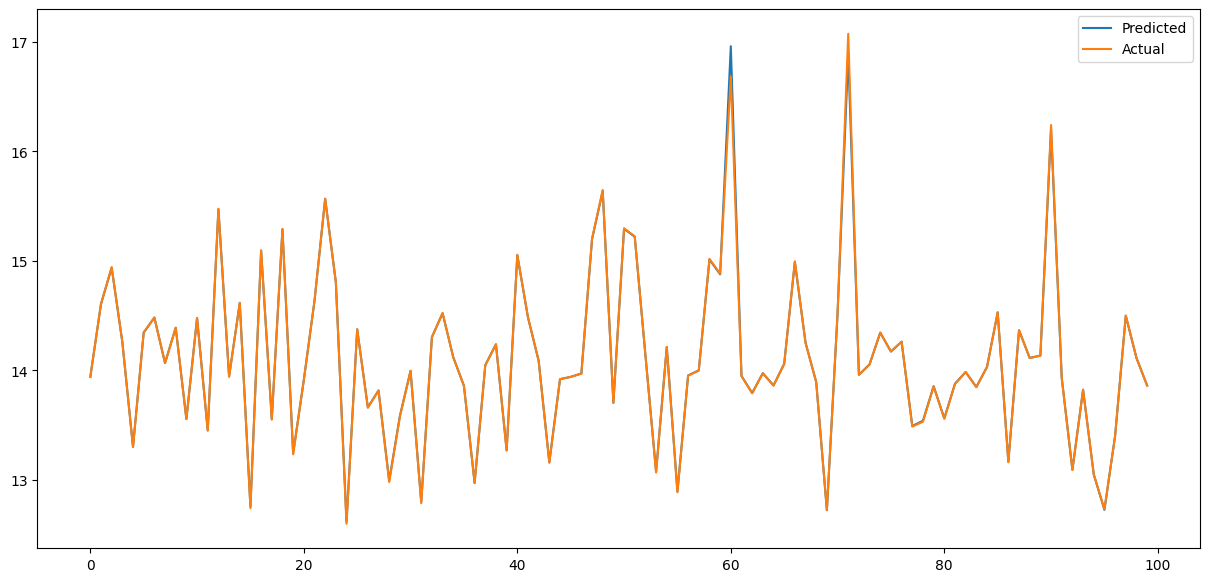

In [ ]:
get_linear_graph(y_predgbg , y_test )

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:
dict1={'Model':'Gradient Boost with GridSearch ',
       'MAE':round((MAEGBG),3),
       'MSE':round((MSEGBG),3),
       'R2_score':round((r2GBG),3)}
       
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
# storing the train set metrics value in a dataframe for later comparison:

dict2={'Model':'Gradient Boost with GridSearch ',
       'MAE':round((MAEtestGBG),3),
       'MSE':round((MSEtestGBG),3),
       'R2_score':round((r2testGBG),3)}
      
test_df=test_df.append(dict2,ignore_index=True) 

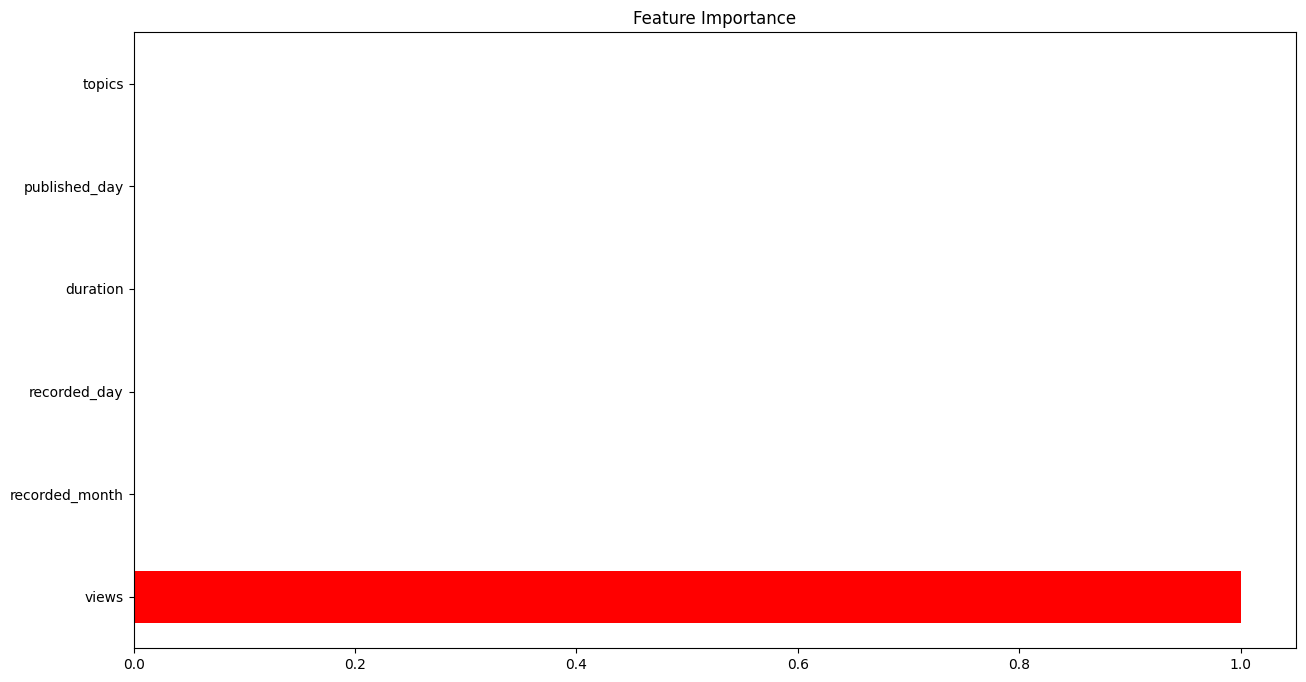

In [ ]:
get_feat_imp(gb_optimal_model)

In [ ]:
# Combining Train and Test erros in a single dataframe:

matrix = pd.concat([training_df,test_df],keys=['Training set','Test set'], axis =1)
matrix

Training set                         \
                             Model    MAE    MSE R2_score   
0               Linear regression   0.000  0.000    1.000   
1           Polynomial regression   0.000  0.000    1.000   
2        Decision Tree Regression   0.008  0.000    1.000   
3  Gradient Boost with GridSearch   0.010  0.003    0.995   

                          Test set                         
                             Model    MAE    MSE R2_score  
0               Linear regression   0.000  0.000    1.000  
1           Polynomial regression   0.000  0.000    1.000  
2        Decision Tree Regression   0.010  0.000    1.000  
3  Gradient Boost with GridSearch   0.011  0.002    0.996

In [ ]:
temp= test_df[['Model','R2_score']]
temp= temp.sort_values(by='R2_score', ascending=True)

<Axes: xlabel='Model'>

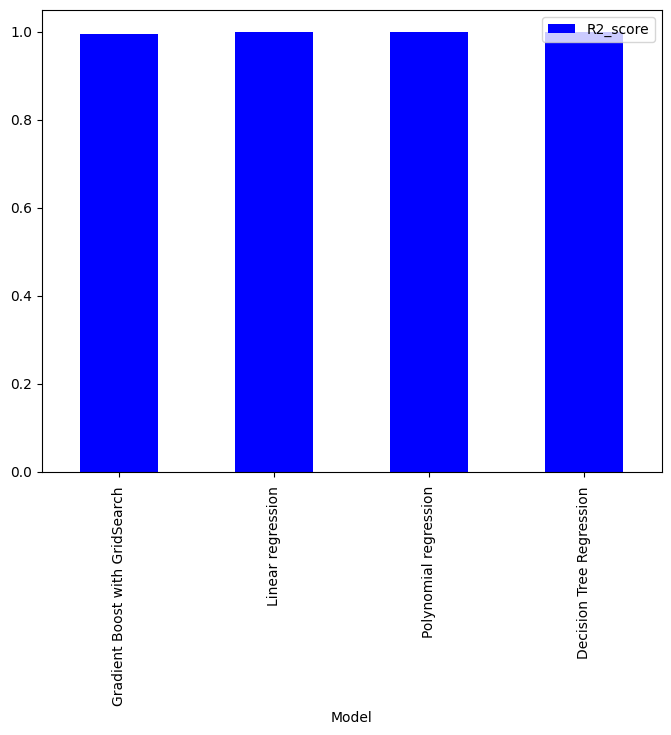

In [ ]:
temp.plot(x="Model", y=["R2_score"],color ='b' ,kind="bar", figsize=(8, 6))

##### Which hyperparameter optimization technique have you used and why?

Here we are going to use Gridsearchcv  for our hyper parameter tunig just to check our model performace GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

is is considerably same as we are geting the same r2 score and in the map also 
is is showing that our paramter selection is also good ...

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

As from the above all models are doing well so we has chosen as gridsearchcv for better model prediction but we got the same output as expected

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

As we can see every model is performing well but we can choose decision tree regressor..

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

here we are going to use shapy

In [ ]:
!pip install shap==0.40.0
import shap 
import graphviz
sns.set_style('darkgrid') 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 11.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shap: filename=shap-0.40.0-cp310-cp310-linux_x86_64.whl size=552503 sha256=1a35386681a9a5d069706bbc57a356a6fb03c0d3ccccb40935e6b48367f8e374
  Stored in directory: /root/.cache/pip/wheels/33/28/e3/62a9dc612c58c1b8d1c16fa51e64941bbb38ac8a6decbad39c
Successfully built shap


In [ ]:
#creating function for getting shape of JS visualization using shap in notebook environment
def get_shap(model):
  sns.set_style('darkgrid')
  for_instance=2
  shap.initjs() #to get JS visualisation
  explainer = shap.TreeExplainer(model)
  shap_values = explainer(X_test,check_additivity=False) #using explainer.shap_values to get shap values of each feature
  return shap.plots.force(shap_values[for_instance],feature_names=df.columns)

In [ ]:
#Creating Function to get SHAP summary:-
def get_shap_summary(model):
  model.fit(X_test,y_test)
  explainer = shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test,check_additivity=False) #using explainer.shap_values to get shap values of each feature
  return shap.summary_plot(shap_values, X_test,feature_names=df.columns) #getting the names of feature and plotting the same using feature_names from X's features as X.columns


In [ ]:
#creatung function to get shap summary
def get_shap_summary2(model):
  model.fit(X_test,y_test)
  explainer = shap.TreeExplainer(model)
  shap_values=explainer.shap_values(X_test,check_additivity=False) #using explainer.shap_values to get shap values of each feature
  return shap.summary_plot(shap_values, X_test, plot_type="bar",feature_names=df.columns)  #getting the names of feature and plotting the same

In [ ]:
#calling function to get shap JS visualization:
get_shap(decision_regressor)

In [ ]:
#calling functions to get shap summary:
get_shap_summary(decision_regressor)
get_shap_summary2(decision_regressor)

1-Here we can see negative feature or blue color block pushes the prediction toward left over base value and causing prediction negative.  
2-The highest feature value is views and lowest is recorded month

In [ ]:
#calling function to get shap JS visualization:
get_shap(gb_grid.best_estimator_)

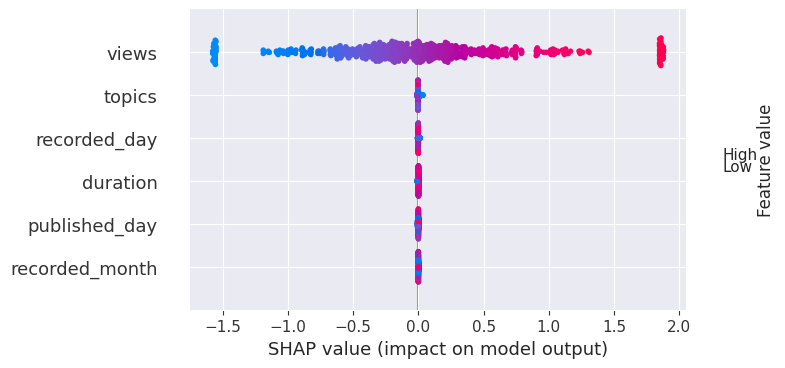

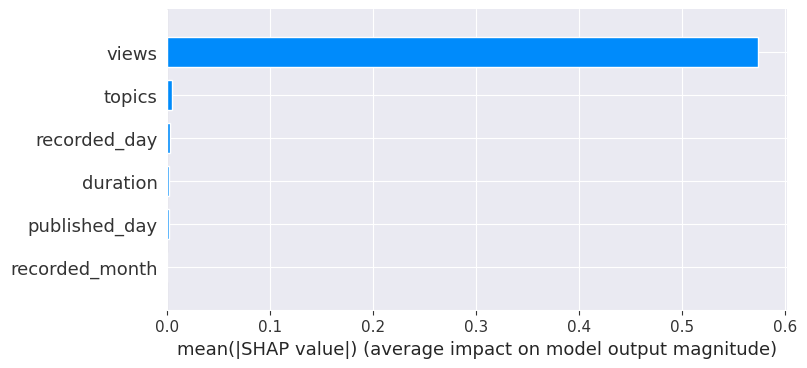

In [ ]:
#calling functions to get shap summary
get_shap_summary(gb_grid.best_estimator_)
get_shap_summary2(gb_grid.best_estimator_)

1-Here we can see negative feature or blue color block pushes the prediction toward left over base value and causing prediction negative.  
2- Here the highest feature value is views and the lowest is recorded_month.  

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

FROM EDA

Each chart provides different insights into the TED talk videos. The chart showing the duration of TED talks allows us to identify the speaker who delivered the longest presentation, while the chart depicting the number of talks published per year shows a growth and decline trend of the business. The chart displaying the relationship between views and comments indicates that popular videos tend to have more comments and foster more discussion. The chart that reveals the number of views per year shows a consistent increase in the number of views, with a sharp decline in 2020 due to the global pandemic. Furthermore, the chart indicating the top ten TED events by views allows us to analyze the factors that contributed to their success, and the chart showing the most popular professions among TED speakers can help in planning future events or inviting speakers from similar professions to attract more viewers. Each chart has its significance and can provide valuable insights into TED talk videos.



TED Talk view prediction regression project was highly successful in achieving accurate predictions of the number of views for TED Talks. The evaluation metrics, including the low mean squared error (MSE) and mean absolute error (MAE), along with the perfect R2 score of 1.0, indicate the exceptional performance of the regression model.

The small MSE values for both the training and testing sets indicate that the model's predictions are very close to the actual number of views. Similarly, the low MAE values suggest that the average absolute difference between the predicted and actual values is small, further confirming the accuracy of the model's predictions.

Moreover, the perfect R2 score of 1.0 signifies that the model captures all the underlying patterns and relationships in the data, explaining all the variability in the number of views for TED Talks. This indicates that the model has a comprehensive understanding of the factors influencing the popularity of TED Talks and can make precise predictions.

Overall, the success of this regression project highlights the effectiveness of the chosen model in accurately forecasting the number of views for TED Talks. Such predictions can be invaluable in understanding the reach and impact of TED Talks, assisting in strategic planning, content optimization, and audience targeting. The model's high accuracy and performance make it a valuable tool for TED and its speakers to make data-driven decisions and optimize their content for maximum impact and viewership.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***